<a href="https://colab.research.google.com/github/Pawanme9034/Netflix_Movies_And_TvShows_Clustering/blob/main/Netflix_Movies_And_TvShows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Netflix movie and TV show Clustering



##### **Project Type - Unsupervised Machine Learning**
##### **Contribution - Individual**
##### **Name -         Pawan Kumar Singh**


# **Project Summary -**



This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, you are required to do**
*   Exploratory Data Analysis
*   Understanding what type content is available in different countries
*   If Netflix has been increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features

# **GitHub Link -**

Repository link-https://github.com/Pawanme9034/Netflix_Movies_And_TvShows_Clustering/blob/main/Netflix_Movies_And_TvShows_Clustering.ipynb


# **Problem Statement**


"The project aims to analyze Netflix's 2019 dataset, exploring content trends, understanding global availability, and investigating shifts in focus between movies and TV shows. Integration with external datasets and clustering similar content based on text features are also key objectives, providing insights into Netflix's content strategy."

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go


# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [2]:
# Load Dataset
import requests
from io import StringIO
# uploading data through Github directly
url = "https://raw.githubusercontent.com/Pawanme9034/Netflix_Movies_And_TvShows_Clustering/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

df=pd.read_csv(data)

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f"Rows and Column count in the Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

Rows and Column count in the Dataset: Rows= 7787, Columns= 12


### Dataset Information

In [5]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")

The total number of duplicated observations in the dataset: 0


#### Missing Values/Null Values

In [7]:
# Display null value count and percentage for each variable
print("-" * 50)
print("Null value count and percentage in each variable:")
print("-" * 50)

# Null value count
null_count = df.isnull().sum()

# Percentage of null values
null_percentage = (null_count / len(df)) * 100

# Display results in a DataFrame
null_info = pd.DataFrame({
    "Null Count": null_count,
    "Percentage": null_percentage
})

print(null_info)
print("-" * 50)


--------------------------------------------------
Null value count and percentage in each variable:
--------------------------------------------------
              Null Count  Percentage
show_id                0    0.000000
type                   0    0.000000
title                  0    0.000000
director            2389   30.679337
cast                 718    9.220496
country              507    6.510851
date_added            10    0.128419
release_year           0    0.000000
rating                 7    0.089893
duration               0    0.000000
listed_in              0    0.000000
description            0    0.000000
--------------------------------------------------


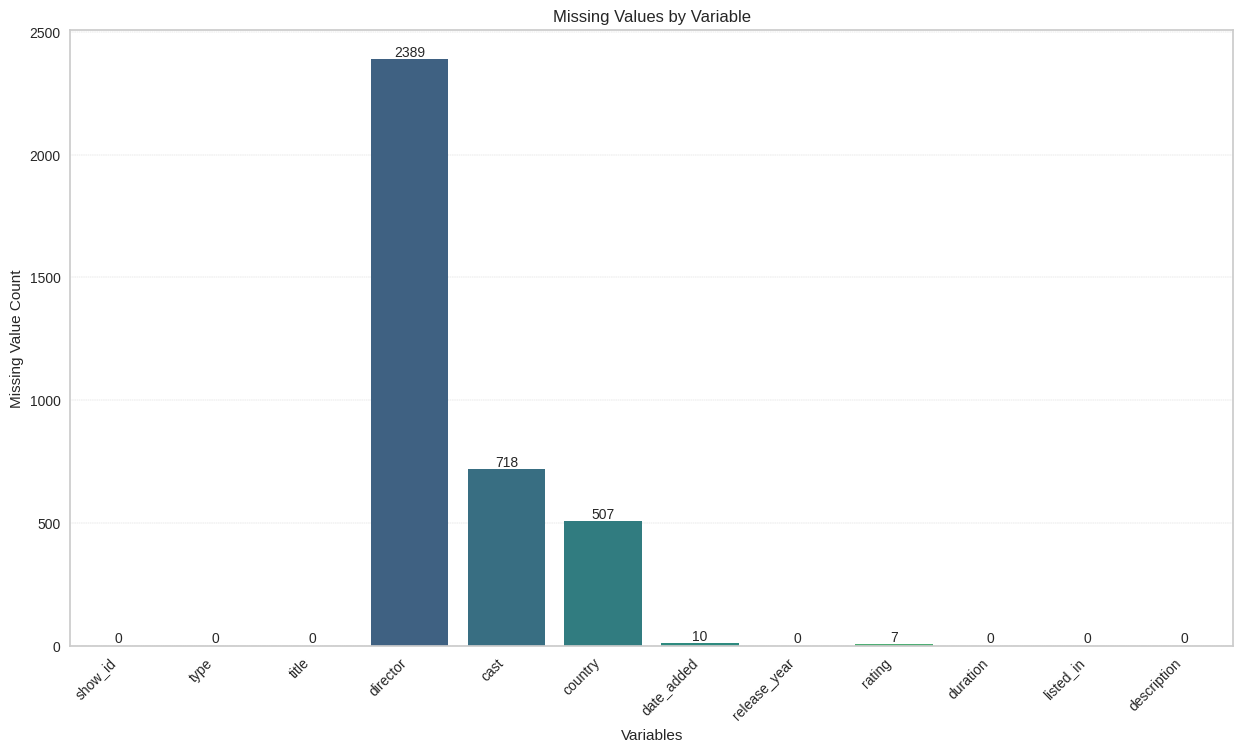

In [8]:
# Visualizing the missing values with a bar plot
plt.figure(figsize=(15, 8))
missing_values = df.isna().sum()

# Using a color gradient for better visualization
color_palette = sns.color_palette("viridis", len(df.columns))
plots = sns.barplot(x=missing_values.index, y=missing_values, palette=color_palette)

plt.title("Missing Values by Variable")
plt.xlabel("Variables")
plt.ylabel("Missing Value Count")

# Display the count of missing values on each bar
for i, val in enumerate(missing_values):
    plots.text(i, val, str(val), ha='center', va='bottom', size=10)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.3)
plt.show()


### What did you know about your dataset?


The dataset "Netflix Movies and TV Shows Clustering" comprises 12 columns, with only one column having an integer data type. It does not contain any duplicate values, but it does have null values in five columns: **director, cast, country, date_added, and rating.**

This dataset provides a valuable resource for exploring trends in the range of movies and TV shows available on Netflix. Additionally, it can be utilized for developing clustering models to categorize similar titles together based on shared attributes such as **genre, country of origin, and rating.**

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [10]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
print("Number of unique values in each column:")
print("-" * 40)

for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} unique values")

print("-" * 40)
print(f"Total number of rows in the DataFrame: {len(df)}")


Number of unique values in each column:
----------------------------------------
show_id: 7787 unique values
type: 2 unique values
title: 7787 unique values
director: 4049 unique values
cast: 6831 unique values
country: 681 unique values
date_added: 1565 unique values
release_year: 73 unique values
rating: 14 unique values
duration: 216 unique values
listed_in: 492 unique values
description: 7769 unique values
----------------------------------------
Total number of rows in the DataFrame: 7787


## 3. ***Data Wrangling***

### Data Wrangling Code

####1.  Handling Null values from each feature

In [12]:
## Imputing null value as per our discussion
# imputing with unknown in null values of director and cast feature
df[['director','cast']]=df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
df['country']=df['country'].fillna(df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
df.dropna(axis=0, inplace=True)

In [13]:
# Display null value count and percentage for each variable
print("-" * 50)
print("Null value count and percentage in each variable:")
print("-" * 50)

# Null value count
null_count = df.isnull().sum()

# Percentage of null values
null_percentage = (null_count / len(df)) * 100

# Display results in a DataFrame
null_info = pd.DataFrame({
    "Null Count": null_count,
    "Percentage": null_percentage
})

print(null_info)
print("-" * 50)


--------------------------------------------------
Null value count and percentage in each variable:
--------------------------------------------------
              Null Count  Percentage
show_id                0         0.0
type                   0         0.0
title                  0         0.0
director               0         0.0
cast                   0         0.0
country                0         0.0
date_added             0         0.0
release_year           0         0.0
rating                 0         0.0
duration               0         0.0
listed_in              0         0.0
description            0         0.0
--------------------------------------------------


####2.  Handling nested columns i.e 'director', 'cast', 'listed_in' and 'country'

In [14]:
# Let's create a copy of dataframe and unnest the original one
df_new= df.copy()

In [15]:
# Unnesting 'Directors' column
dir_constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)

,title,Directors
7406,The Reliant,Paul Munger
8421,You Are My Home,Amanda Raymond
88,2036 Origin Unknown,Hasraf Dulull
4894,NOVA: Prediction by the Numbers,Daniel McCabe
3658,Killing Them Softly,Andrew Dominik
5160,Pasión de Gavilanes,Unknown
5413,Pusher,Luis Prieto
4993,Once In A Lifetime Sessions with TLC,Matt Askem
4362,Mexicanos de Bronce,Julio Fernández Talamantes
2914,"Hello, Love, Goodbye",Cathy Garcia-Molina


In [16]:
# Unnesting 'cast' column
cast_constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_constraint, index = df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

,title,Actors
52596,True: Wuzzle Wegg Day,Cory Doran
38287,Salem: His Sister's Father,Aliaa Al-Husseini
55267,White Island,Ben Cura
37507,Robozuna,Rufus Jones
23228,Journey of an African Colony,Olasupo Shasore
10708,Coin Heist,Alex Saxon
231,#realityhigh,Keith Powers
42411,Superfly,Nate Adams
6132,Beiimaan Love,Rajneesh Duggal
30531,Moving On,Mano Maniam


In [17]:
# Unnesting 'listed_in' column
listed_constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(listed_constraint, index = df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)



,title,Genre
11818,Satrangi Re,Dramas
15527,Time Share,Dramas
14846,The Promised Neverland,International TV Shows
3207,College Romance,TV Comedies
16535,What the F* Is Going On?,International Movies
5223,Ghayal,Dramas
3771,Devil's Gate,Horror Movies
13824,The Eichmann Show,International Movies
14195,The Inmate,Spanish-Language TV Shows
12277,Silver Spoon,TV Action & Adventure


In [18]:
# Unnesting 'country' column
country_constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

,title,Country
2993,GODZILLA City on the Edge of Battle,Japan
2536,Eyyvah Eyyvah 3,Turkey
3286,Heneral Luna,Philippines
5202,My Little Baby,South Korea
8744,Tomorrow Never Dies,United Kingdom
2571,Fangbone,Canada
8791,Traitor,United States
8374,The Score,Canada
6957,Spy Kids 2: The Island of Lost Dreams,United States
4023,Kath and Kim,Australia


**Great, we have sucessfully separated the nested columns. Now let's just merge all the created dataframe into the single merged dataframe.**

## Merging all the unnested dataframes

In [19]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
df7.head()

,title,Actors,Directors,Genre,Country
0,3%,João Miguel,Unknown,International TV Shows,Brazil
1,3%,João Miguel,Unknown,TV Dramas,Brazil
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil


Cool, now let's merge this dataframe with the original one on the left join to avoid information loss.

In [20]:
# Merging unnested data with the created dataframe in order to make the final dataframe
df = df7.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df.head()

,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...


#### 3. Typecasting of attributes

In [21]:
# Checking info of the dataset before typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   date_added    175807 non-null  object
 7   release_year  175807 non-null  int64 
 8   rating        175807 non-null  object
 9   duration      175807 non-null  object
 10  description   175807 non-null  object
dtypes: int64(1), object(10)
memory usage: 16.1+ MB


In [22]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))

# Typecasting string object to datetime object of date_added column
df['date_added']= pd.to_datetime(df['date_added'])

# Extracting date, day, month and year from date_added column
df["day_added"]= df["date_added"].dt.day
df["month_added"]= df["date_added"].dt.month
df["year_added"]= df["date_added"].dt.year

# Dropping date_added
df.drop('date_added', axis=1, inplace=True)

In [23]:
# Checking info of the dataset after typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   release_year  175807 non-null  int64 
 7   rating        175807 non-null  object
 8   duration      175807 non-null  int64 
 9   description   175807 non-null  object
 10  day_added     175807 non-null  int64 
 11  month_added   175807 non-null  int64 
 12  year_added    175807 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 18.8+ MB


In [24]:
#checking unique value in rating column
unique_ratings = df['rating'].unique()
print("Unique values in the 'rating' column:")
print(unique_ratings)


Unique values in the 'rating' column:
['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']


#### 4. Binning of Rating attribute

Adult Content: This category includes content intended for mature audiences. It may contain strong language, violence, nudity, and sexual content. Examples: TV-MA, NC-17, R.

Children Content: Geared towards younger audiences, this category is suitable for all ages. It may contain mild violence, language, and suggestive content. Examples: TV-PG, PG, TV-G, G.

Teen Content: Intended for teenagers, this category may contain violence, mild to moderate language, and suggestive content. Examples: PG-13, TV-14.

Family-friendly Content: Tailored for family viewing, this category is appropriate for children and may contain fantasy violence. Examples: TV-Y, TV-Y7, TV-Y7-FV.

Not Rated: Content that has not been rated by a rating board, and it may contain material that is not suitable for all audiences. Examples: NR, UR.

**Let's not complicate it and create bins as following:**
* **Adult Content**: TV-MA, NC-17, R
* **Children Content**:  TV-PG, PG, TV-G, G
* **Teen Content**: PG-13, TV-14
* **Family-friendly Content**: TV-Y, TV-Y7, TV-Y7-FV
* **Not Rated**: NR, UR

In [25]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [26]:
#checking unique value in rating column
unique_ratings = df['rating'].unique()
print("Unique values in the 'rating' column:")
print(unique_ratings)

Unique values in the 'rating' column:
['Adult Content' 'Teen Content' 'Children Content' 'Not Rated'
 'Family-friendly Content']


#### 5. Separating Movies and TV Shows

In [27]:
# Spearating the dataframes for further analysis
df_movies= df[df['type']== 'Movie']
df_tvshows= df[df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(126079, 13) (49728, 13)


### What all manipulations have you done and insights you found?

Handling Null Values:

Imputed 'director' and 'cast' with 'Unknown'.
Imputed 'country' with the mode.
Dropped null values of 'date_added' and 'rating' (based on a low percentage).

Unnesting Values:

Unnested values from the 'director', 'cast', 'listed_in', and 'country' columns, storing them in separate DataFrames.
Merged all the unnested DataFrames with the original one using a left join to isolate the values of each feature.

Typecasting:

Typecasted 'duration' into an integer (removing 'min' and 'seasons' from the values).
Typecasted 'date_added' to datetime format.

Feature Extraction:

Extracted 'date', 'month', and 'year' from 'date_added'.


Rating Categorization:

Created five bins for the 'rating' column based on content appropriateness for different age groups: Adult, Restricted, Teen, All Ages, and Not Rated.

Data Splitting:

Split the dataframe into two separate DataFrames, 'df_movies' (containing only Movies) and 'df_tvshows' (containing only TV Shows).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Percentage of total number of Movies and TV Shows over Netflix

In [28]:
import plotly.graph_objects as go

# Data
labels = ['TV Show', 'Movie']
values = [df['type'].value_counts()['TV Show'], df['type'].value_counts()['Movie']]

# Calculate percentages
total = sum(values)
percentages = [(value / total) * 100 for value in values]

# Colors
colors = ['#ffd700', '#008000']

# Create bar chart
fig = go.Figure(data=[go.Bar(x=labels, y=values, text=percentages, textposition='auto', marker_color=colors)])

# Customize layout
fig.update_layout(
    title_text='Type of Content on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    xaxis_title='Type of Content',
    yaxis_title='Count',
    legend=dict(x=0.9),
)

# Show plot
fig.show()


##### 1. Why did you pick the specific chart?

The bar chart was chosen because it effectively compares the count of TV shows and movies on Netflix, making it easy to interpret and providing a clear visual representation of the distribution. The addition of percentages enhances the understanding of the relative proportion of each category.

##### 2. What is/are the insight(s) found from the chart?

1. We can see that the majority of the content on Netflix is movies, which account for around two-thirds of the total content. TV shows make up the remaining one-third of the content.

2. we can conclude that in the given Data set only **28.3% are TV Shows and 71.7% are Movies.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

Content Strategy Refinement:

 Netflix can use this insight to refine its content acquisition and production strategy. If the majority of users prefer movies, Netflix might invest more in securing popular movies and producing exclusive movie content.

User Engagement:

 Knowing the content preferences helps tailor the user experience. If movies are more popular, Netflix can optimize recommendations, user interfaces, and marketing strategies to enhance engagement with movie content.

Monetization Opportunities:

Understanding the content mix can influence advertising and monetization strategies. If movies are more popular, Netflix might explore partnerships, promotions, or advertising models specifically tailored to movie content.

Negative Impact:

Potential Loss of TV Show Enthusiasts:

 While the data indicates a preference for movies, a negative impact could arise if Netflix neglects the TV show segment. If there's a significant audience interested in TV shows, overlooking this segment might lead to a decline in subscriber retention or acquisition.

Competitive Challenges:

 Other streaming platforms might focus more on TV shows, creating a competitive advantage in that segment. Neglecting TV shows entirely could impact Netflix's competitiveness against platforms that cater to a diverse audience.

Limited Audience Reach:

If Netflix heavily invests in movies, it may limit its appeal to a specific demographic. Diversifying content to include popular TV shows could broaden its audience base.

#### Chart - 2

How content is distributed over Netflix?

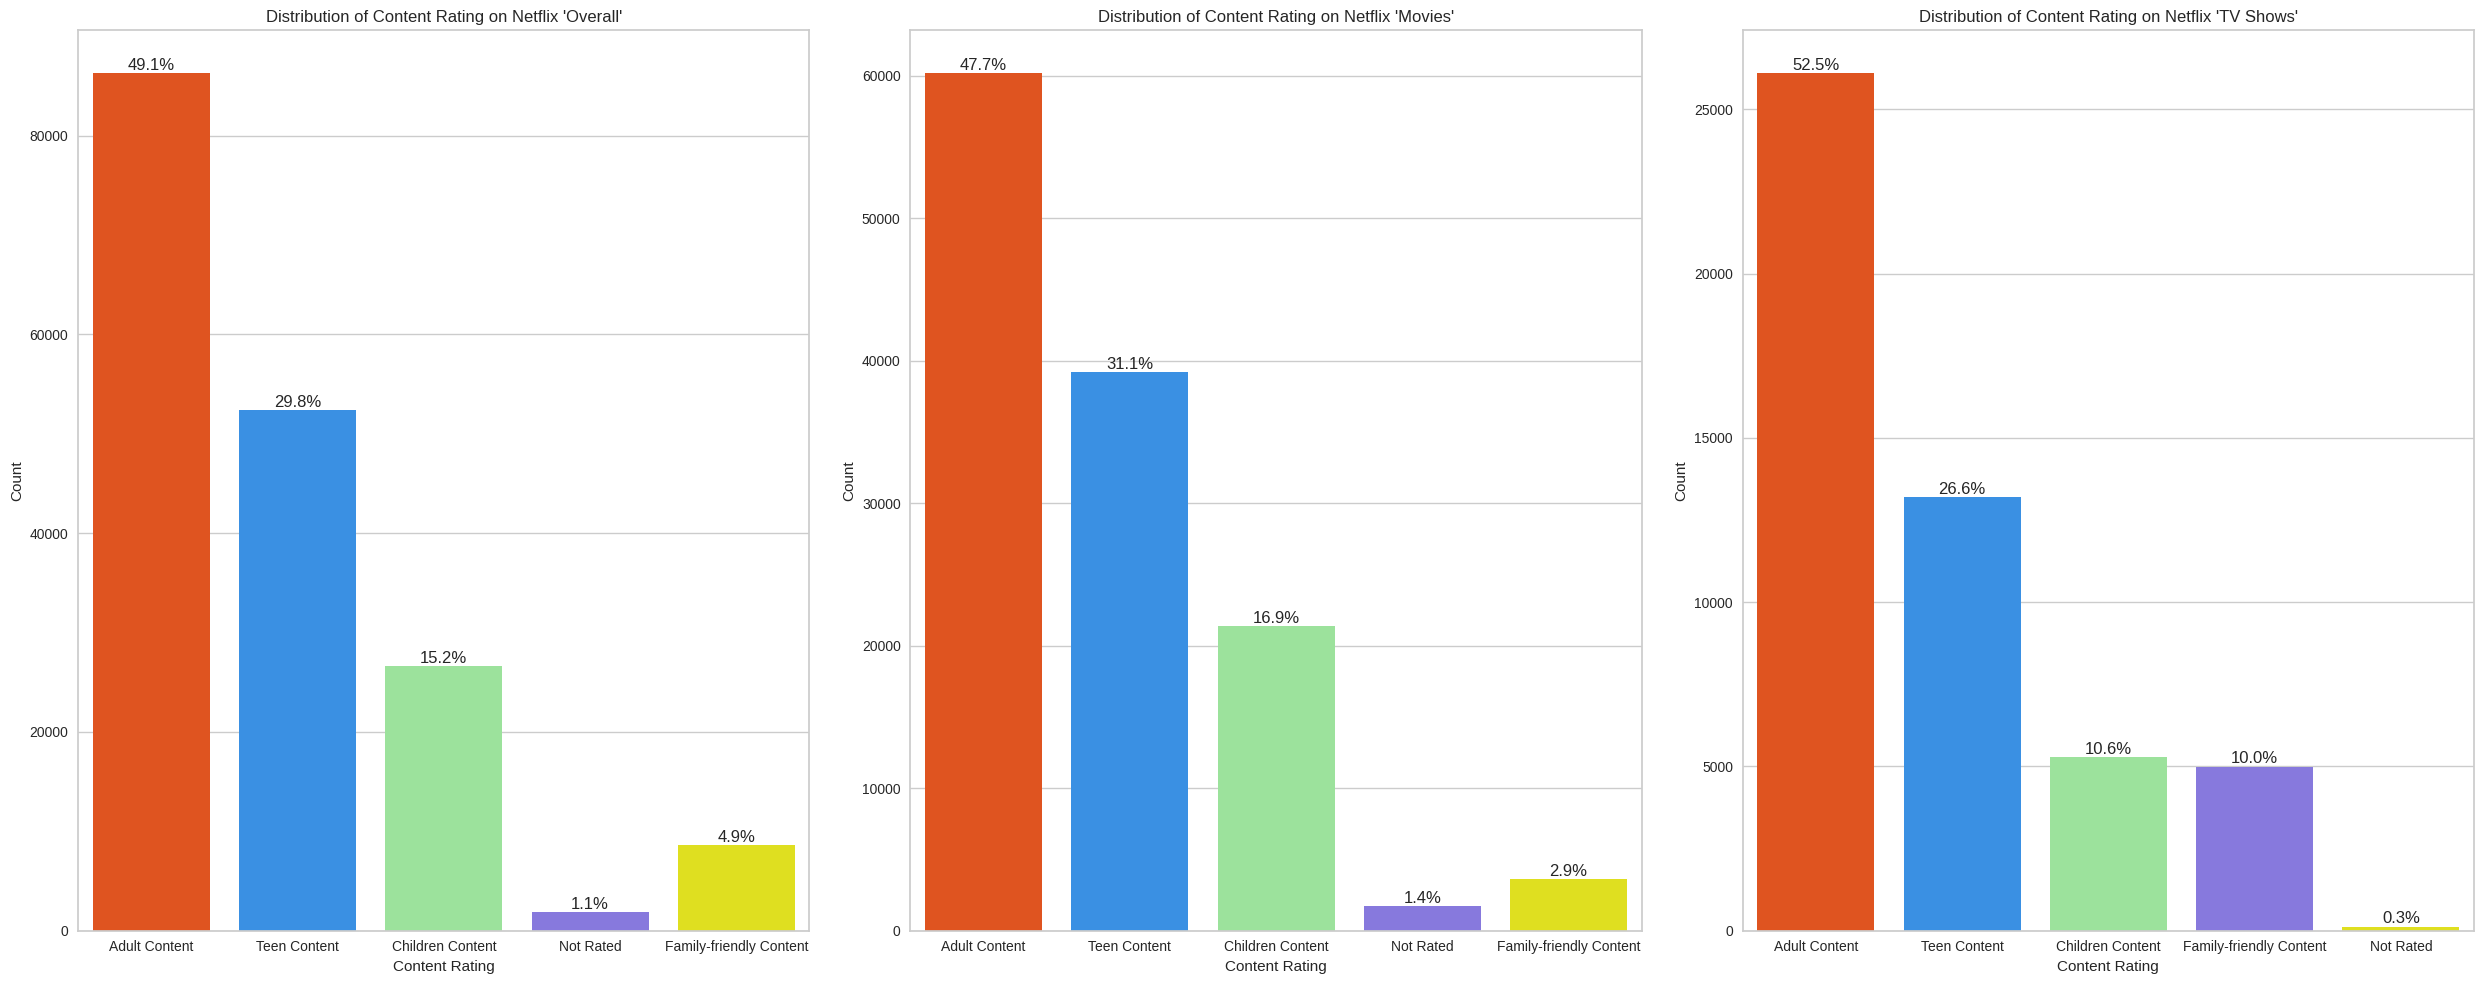

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 10))

# Set the color palette
colors = ['orangered', 'dodgerblue', 'lightgreen', 'mediumslateblue', 'yellow']

for i, (data, title) in enumerate(zip([df, df_movies, df_tvshows], ['Overall', 'Movies', 'TV Shows'])):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x='rating', data=data, palette=colors)

    total = len(data['rating'])
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plt.text(x, y + 5, percentage, ha='center', va='bottom')

    plt.title(f"Distribution of Content Rating on Netflix '{title}'")
    plt.xlabel('Content Rating')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?


The horizontal bar chart was chosen because it effectively represents the count distribution of categorical content ratings, allowing for easy comparison and readability. Adding percentages on top of each bar enhances the understanding of the relative proportion of each content rating.

##### 2. What is/are the insight(s) found from the chart?

1.We found that most of the content present in the Netflix belongs to Adult and the teen categories.

2.Another important insight we can see that **Family friendly content** less in Movies compared to TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.For high gains production house should more focus on Teen and Adult content.

2.There is good chances of growth in Family-friendly category in TV Shows

#### Chart - 3 (Who are the top actors performing in Movies and TV Shows?)

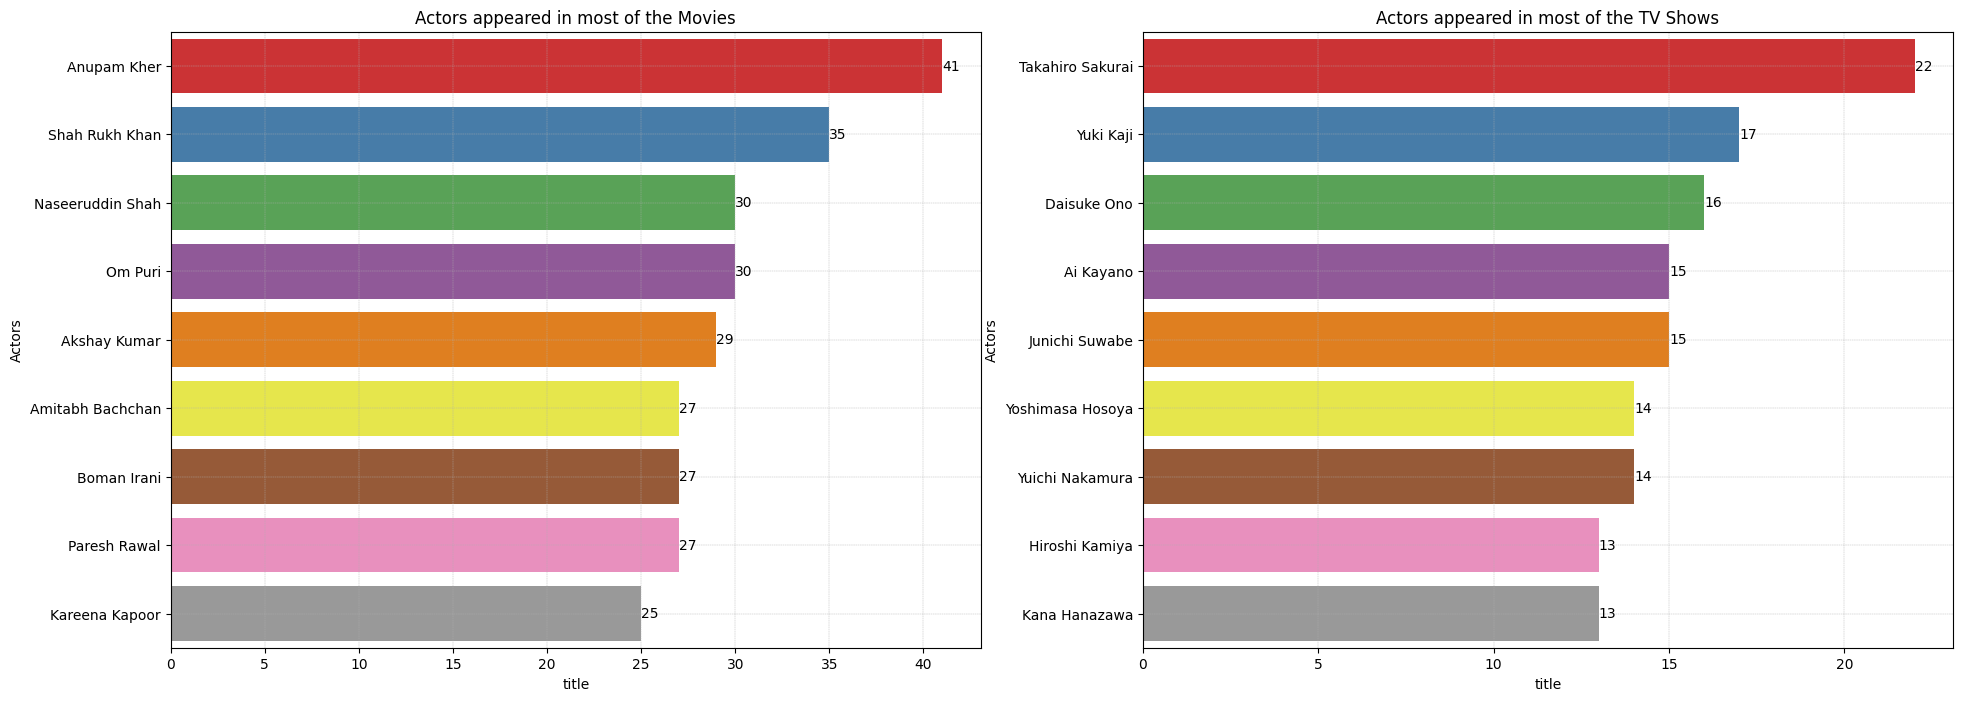

In [30]:
# Top 10 casts in Movies and TV Shows
plt.style.use('default')
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_actor = i.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Actors",x = 'title', data = df_actor, palette='Set1')
  plt.title(f'Actors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which actors are more popular on Netflix.

##### 2. What is/are the insight(s) found from the chart?

1. We found an interesting insight that **most of the Actors in Movies are from INDIA.**

2. No popular actors from india in TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indians are movie lover, they love to watch movies hence business should target indian audience for Movies.

#### Chart - 4 (Who are the top Directors directing Movies and TV Shows?)

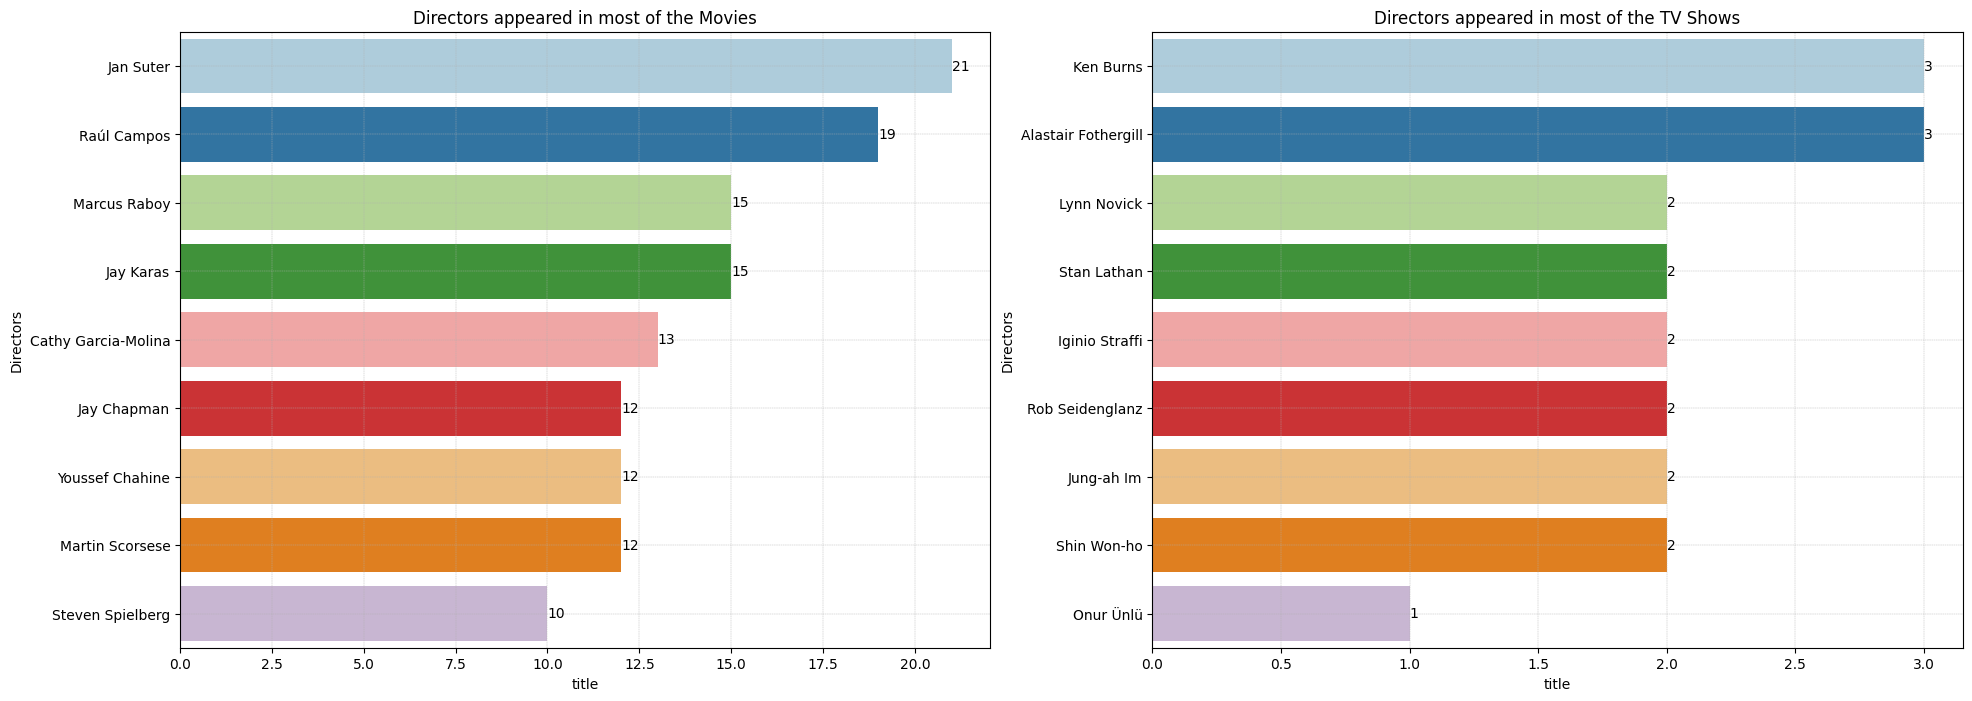

In [31]:
# Top 10 Directors in Movies and TV Shows
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Directors",x = 'title', data = df_director, palette='Paired')
  plt.title(f'Directors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which director is popular in Movies and which one is popular in TV Shows.

##### 2. What is/are the insight(s) found from the chart?

1. We found that most of the movies directed by **jan suter**.

2. Most TV shows directed by **ken burns**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Movie/tvshows producers can select the popular director for their upcoming projects

#### Chart - 5 (What are the top 10 Countries involved in content creation?)

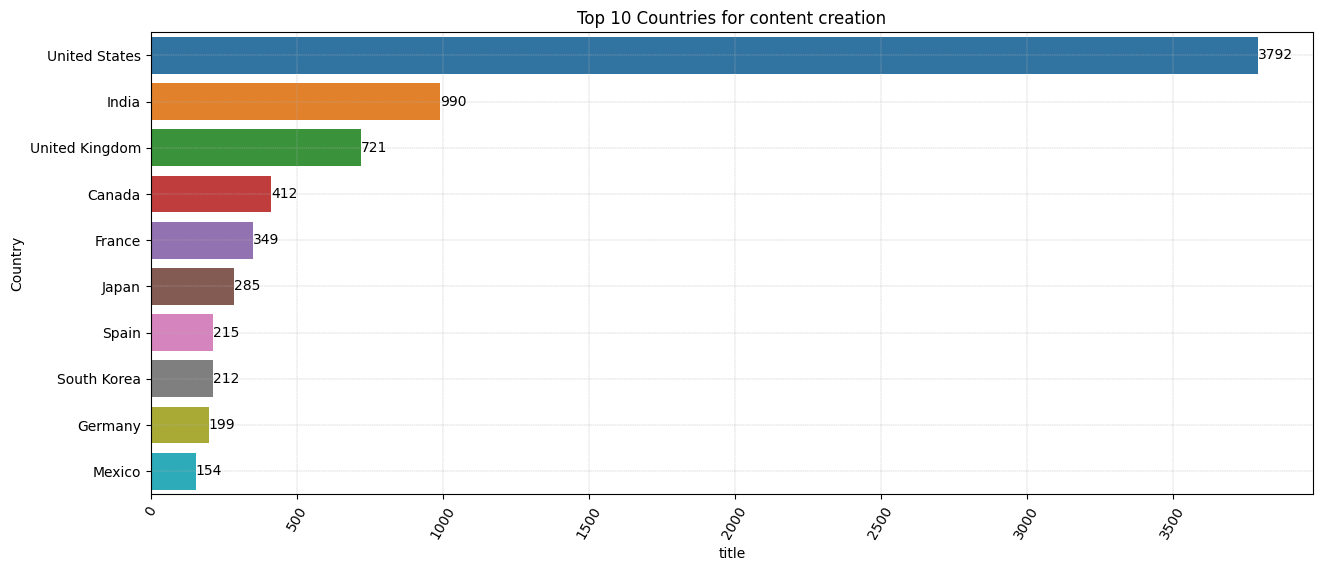

In [32]:
df_country = df.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "Country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which country produces Maximum number of TV Shows and Movies.

##### 2. What is/are the insight(s) found from the chart?

1. The **United States is the top country producing both movies and TV shows on Netflix**. This suggests that Netflix is heavily influenced by American content.

2. **India is the second-highest producer of movies on Netflix**, indicating the growing popularity of Bollywood movies worldwide.

3. Country like canada, france, japan also have significant presence in the data set showing diversity of content on the netflix.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained can have a positive impact on Netflix's business by highlighting opportunities for growth and expansion, such as investing in American and Bollywood content, and acquiring more diverse content.





#### Chart - 6 (Which Countries has the highest spread of Movies and TV Shows over Netflix)

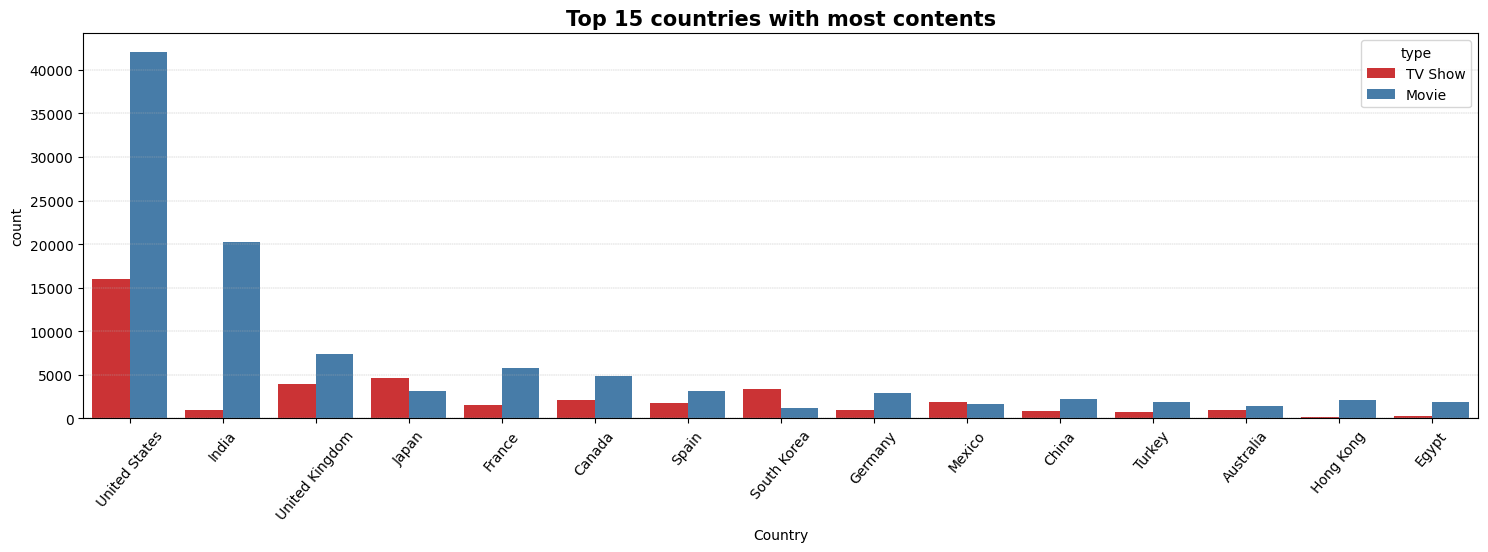

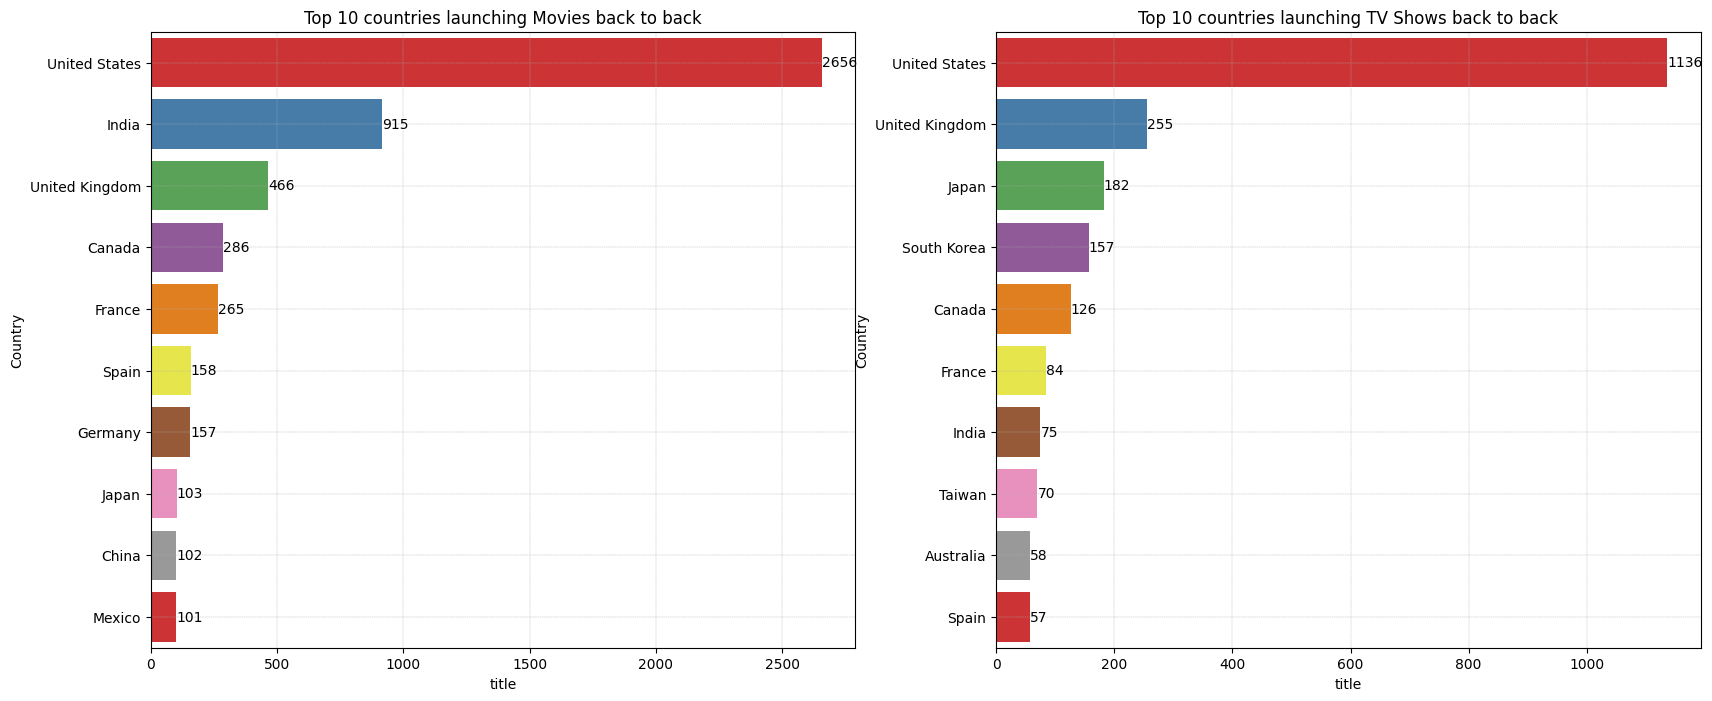

In [33]:
#Analysing top15 countries with most content
plt.figure(figsize=(18,5))
plt.grid(linestyle='--', linewidth=0.3)
sns.countplot(x=df['Country'],order=df['Country'].value_counts().index[0:15],hue=df['type'],palette ="Set1")
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

plt.figure(figsize=(20,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Country",x = 'title', data = df_country, palette='Set1')
  plt.title(f'Top 10 countries launching {j} back to back')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which country produces which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

1. **INDIA Produces most amount of Movies** in compare to TV Shows.

2. Japan and South korea produces more TV Shows in compare to Movies.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained can have a positive impact on Netflix's business by highlighting opportunities for growth and expansion, such as acquiring and producing more movies from India and more TV shows from Japan and South Korea.

#### Chart - 7 (Which Genres are Popular in Netflix)

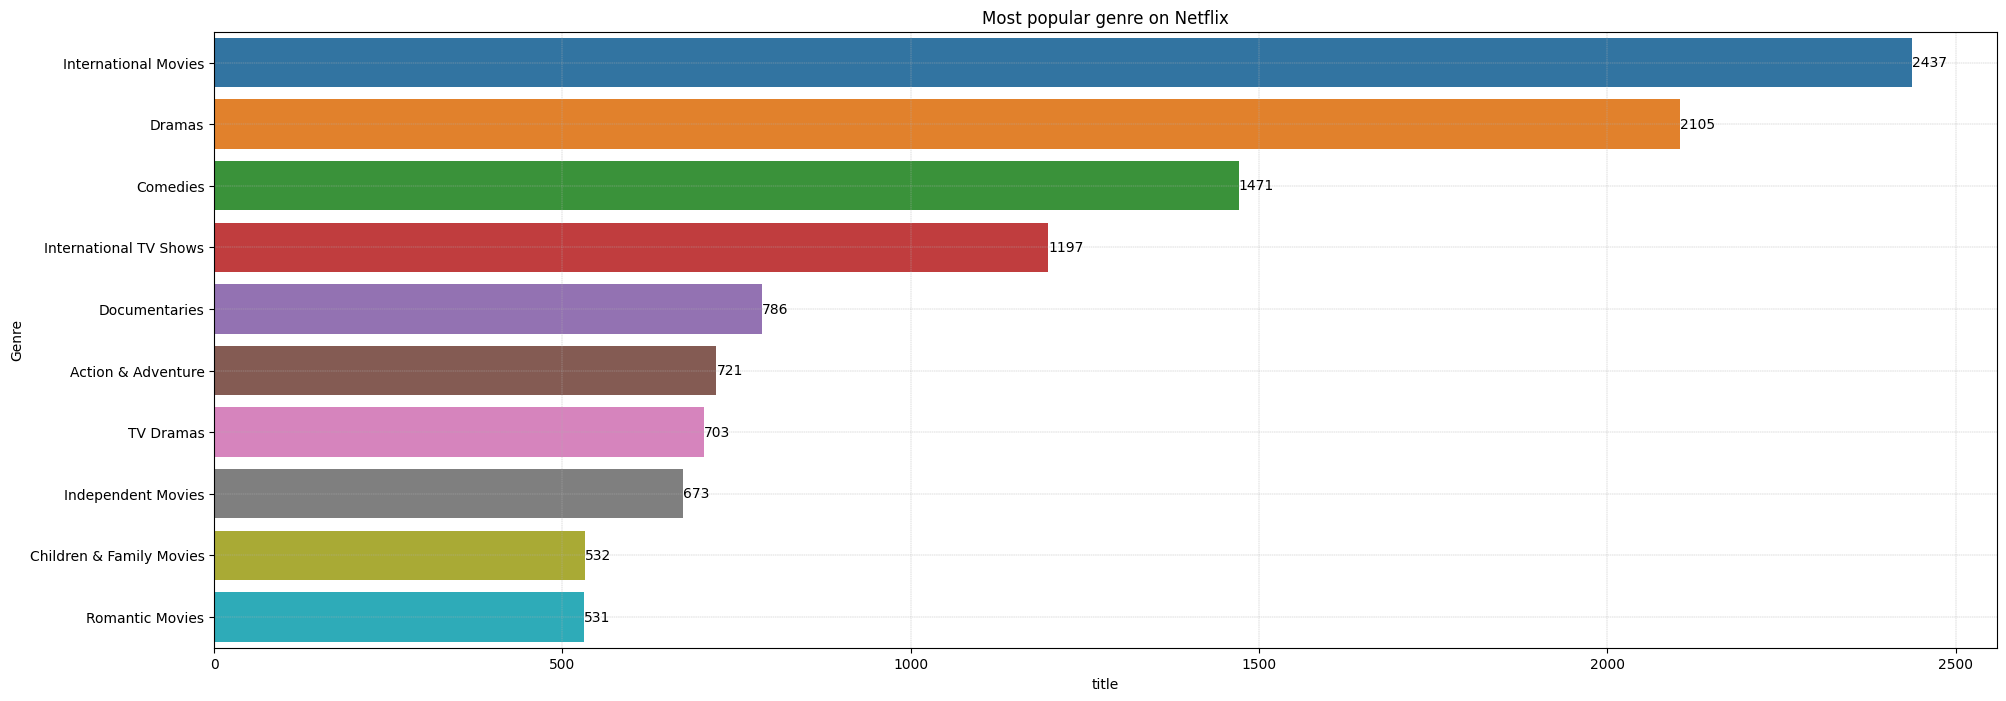

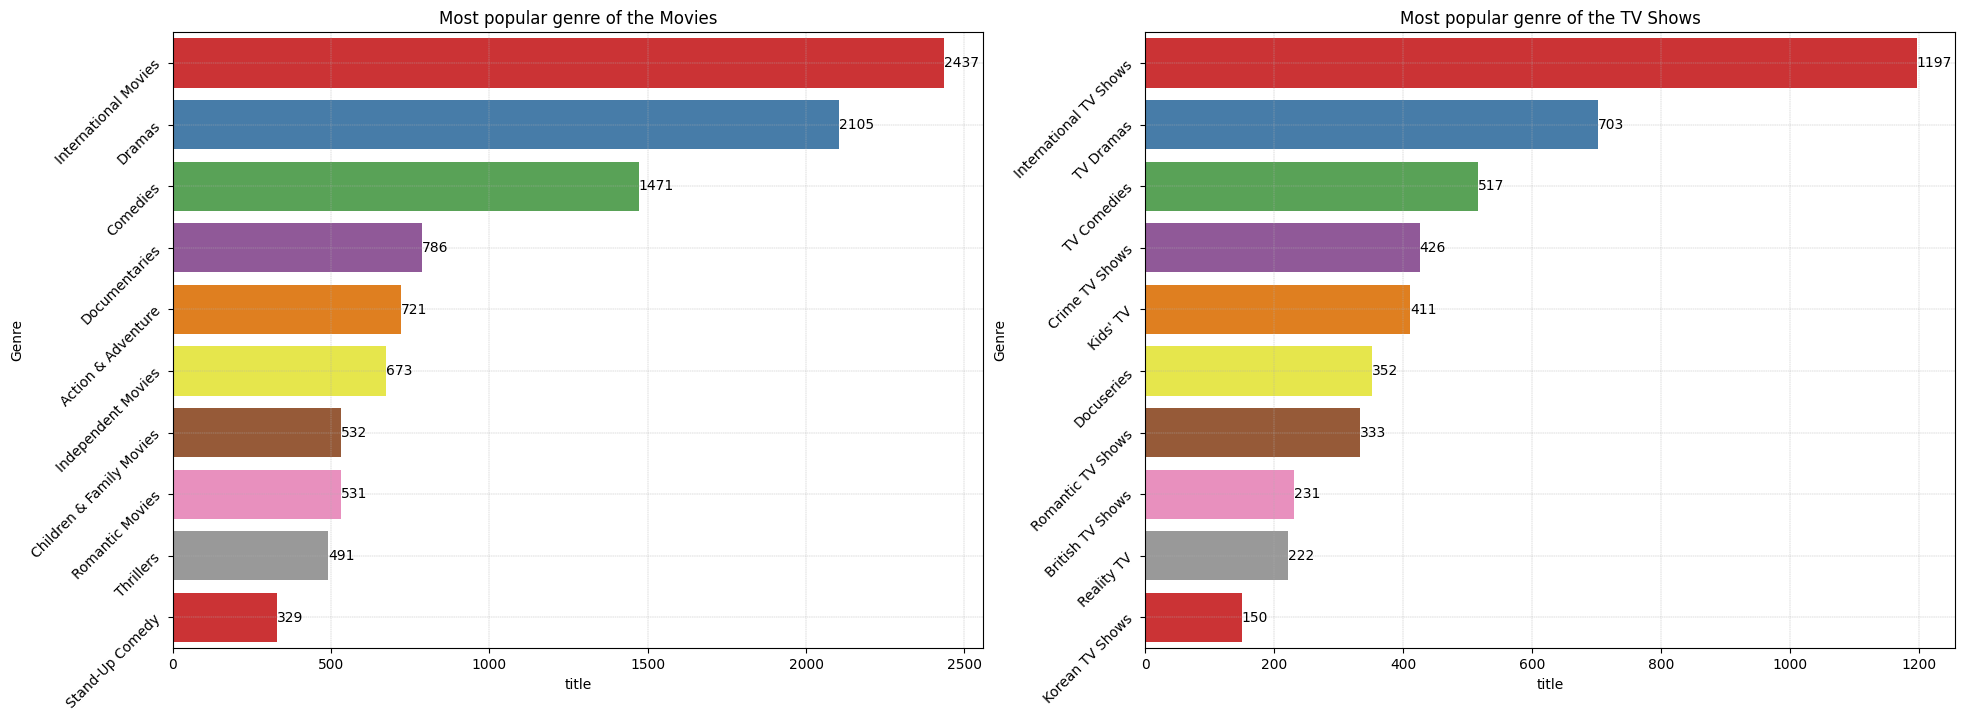

In [34]:
plt.figure(figsize=(23,8))
df_genre = df.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plots= sns.barplot(y = "Genre",x = 'title', data = df_genre)
plt.title(f'Most popular genre on Netflix')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_genre = i.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Genre",x = 'title', data = df_genre, palette='Set1')
  plt.title(f'Most popular genre of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
  plt.yticks(rotation = 45)
plt.show()

##### 1. Why did you pick the specific chart?

This graph tells us which genre is most popular in Netflix.

##### 2. What is/are the insight(s) found from the chart?

1. **International movies genre is most popular** in both the TV Shows and Movies category. Followed by **Drama** and **comedy**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can have a positive impact on Netflix's business by helping the platform understand what genres and types of content are popular with its audience. This information can help Netflix tailor its content acquisition and production strategies to better cater to the preferences of its viewers, which can lead to increased engagement and customer satisfaction.

#### Chart - 8 (Total number of Movies/TV Shows released and added per year on Netflix?)

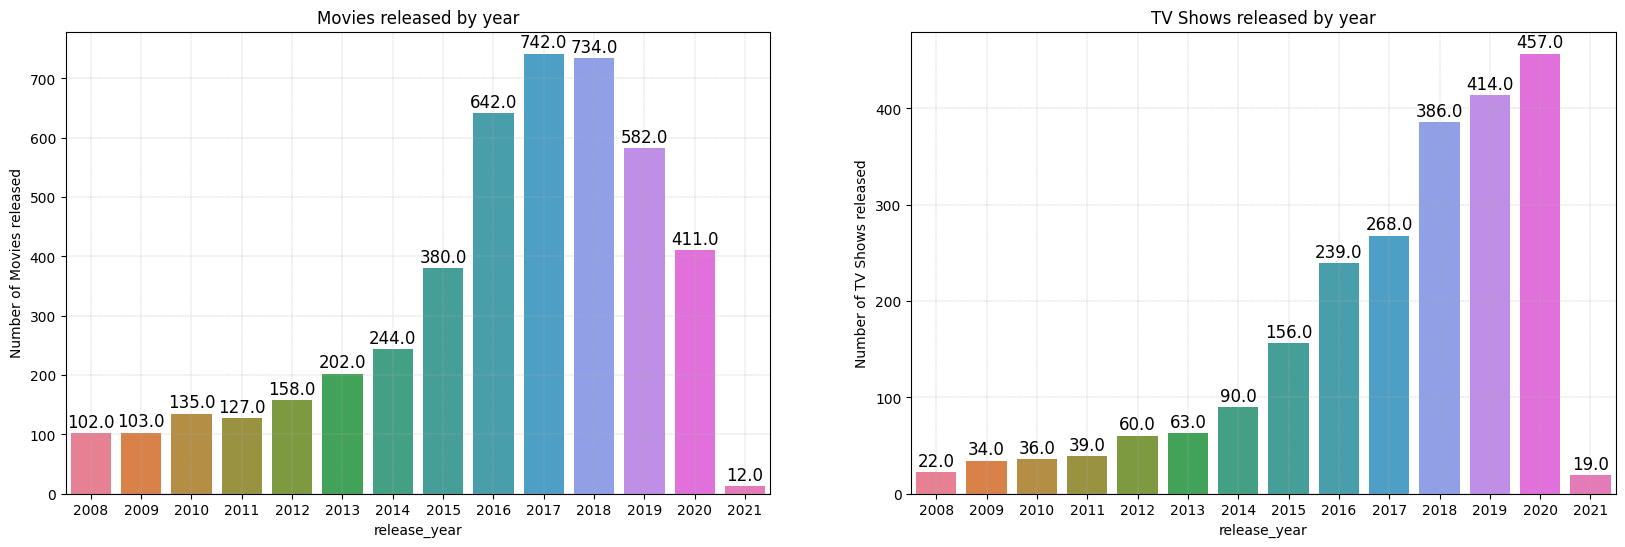

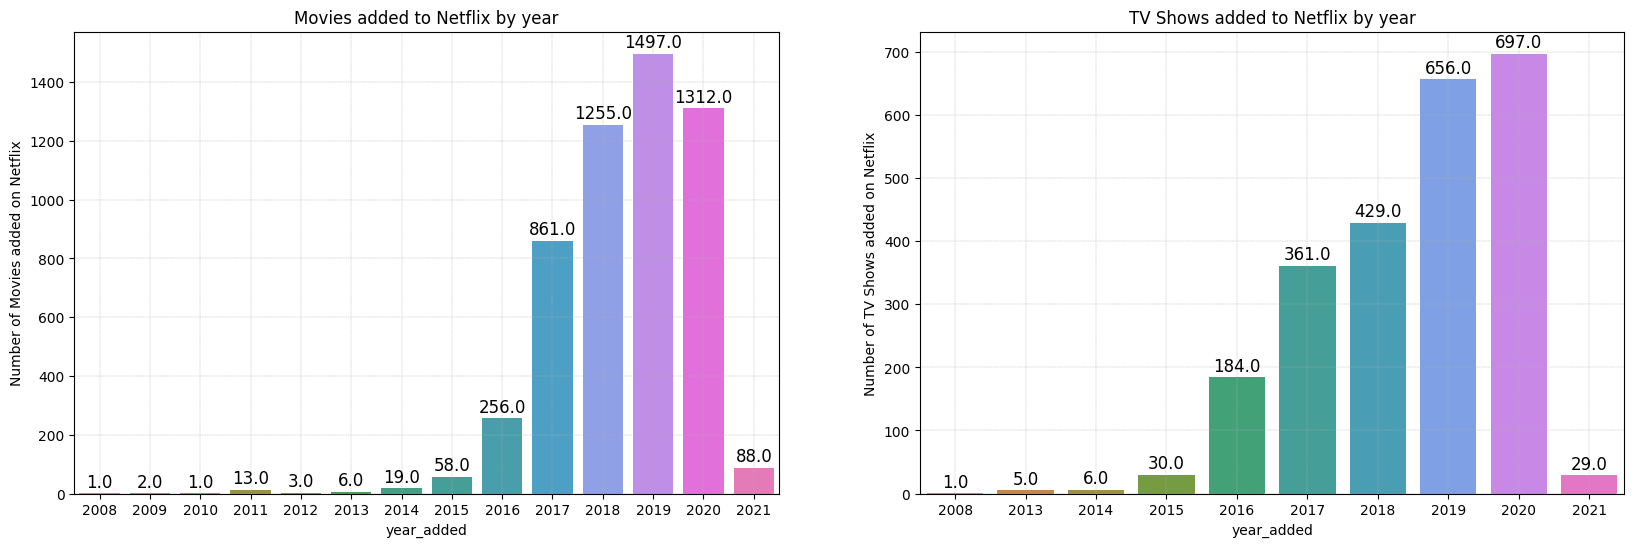

In [35]:
plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_release_year = i.groupby(['release_year']).agg({'title':'nunique'}).reset_index().sort_values(by=['release_year'],ascending=False)[:14]
  plots= sns.barplot(x = 'release_year',y= 'title', data = df_release_year, palette='husl')
  plt.title(f'{j} released by year')
  plt.ylabel(f"Number of {j} released")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
  plots= sns.barplot(x = 'year_added',y= 'title', data = df_country, palette='husl')
  plt.title(f'{j} added to Netflix by year')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us how many  movies and TV Show released and added in a year on Netflix.

##### 2. What is/are the insight(s) found from the chart?

We can see that the **number of movies and TV shows added on Netflix has been increasing steadily every year.** But **since 2018, the number of Movies released on Netflix has been lowered and the number of TV shows released has been significantly increased.** In terms of movies and TV Shows addition, in 2020 Number of movies added as compared to 2019 were vey less and on the other side number of TV Shows were more as compare to 2019.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that the number of movies added has decreased since 2018 while the number of TV shows added has significantly increased could potentially lead to negative growth for Netflix. This could be due to various reasons such as changing consumer preferences, increased competition from other streaming services, and higher production costs associated with creating movies.

To mitigate the potential negative impact, Netflix could explore strategies to diversify its content offerings and adapt to changing consumer preferences. This could include investing in a mix of movies, TV shows, and other forms of original content such as documentaries, limited series, and stand-up comedy specials. By diversifying its content offerings, Netflix can attract a wider audience and maintain its relevance in the ever-evolving streaming landscape.





#### Chart - 9 (Total Number of Movies/TV Shows added per month on Netflix)

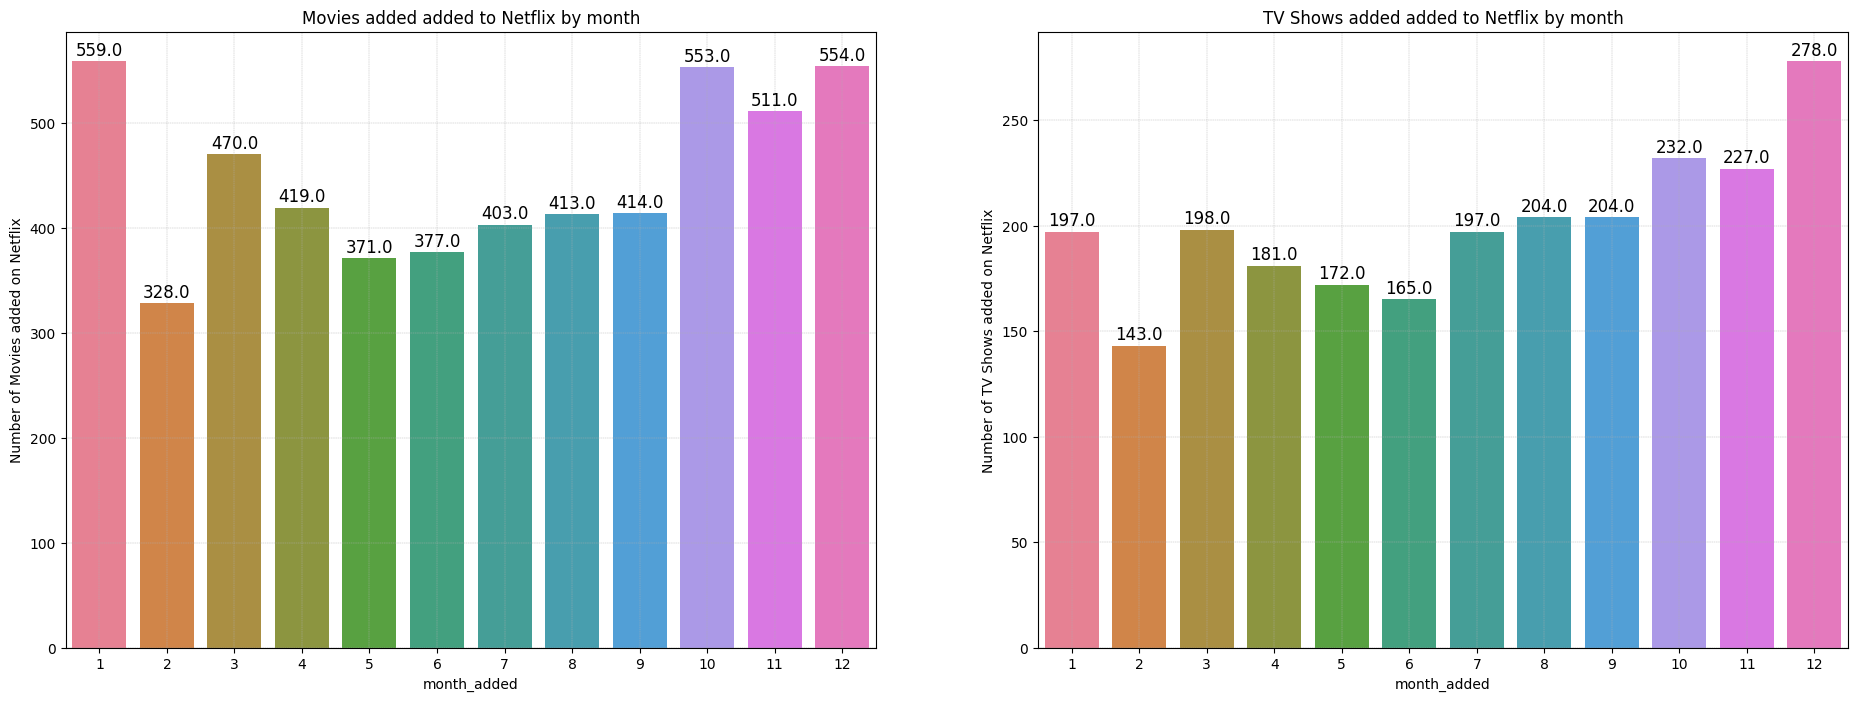

In [36]:
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_month = i.groupby(['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['month_added'],ascending=False)
  plots= sns.barplot(x = 'month_added',y='title', data = df_month, palette='husl')
  plt.title(f'{j} added added to Netflix by month')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

We have plotted this graph to know in which month the movie/tv shows added is **maximum** and in which year **minimum**.

##### 2. What is/are the insight(s) found from the chart?

1. We found that **October, November and December are the most popular months for TV shows addition**.

2. **January, October and December are the most popular months for movie addition**.

3. February is the least popular month for the movies and TV shows to be added on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can help Netflix create a positive business impact by identifying the most popular months for new content additions. This can help Netflix plan content releases during peak periods, leading to increased user engagement and retention.

The insight that February is the least popular month for new content additions could potentially lead to negative growth if Netflix does not maintain a consistent flow of new content during this period. It is important for Netflix to keep its audience engaged throughout the year to avoid dissatisfaction and potential loss of subscribers.

#### Chart - 10 (Total Number of Movies/TV Shows added per day on Netflix)

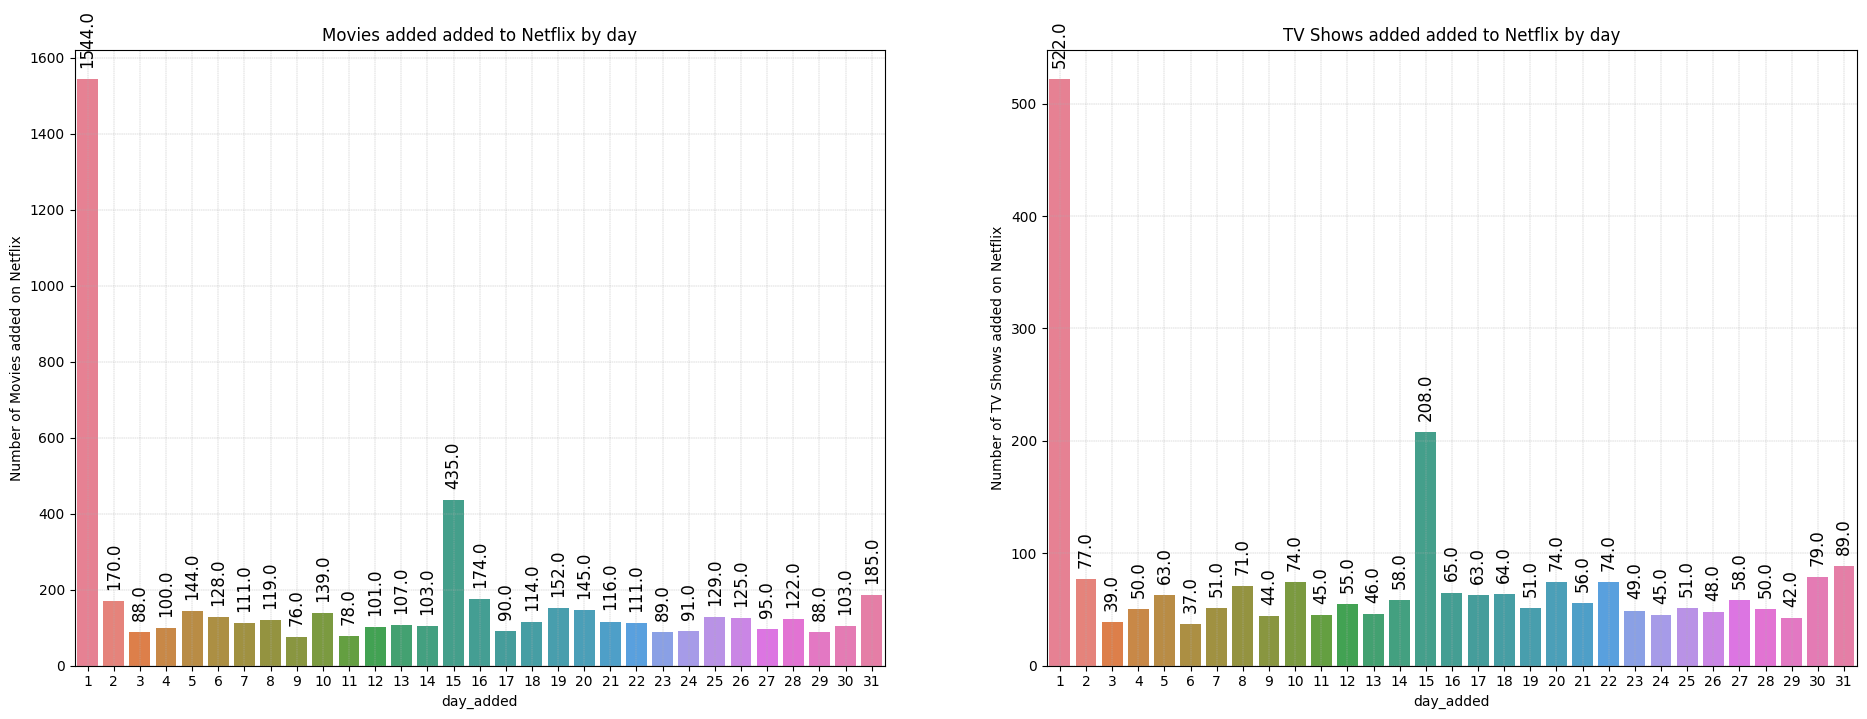

In [37]:
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_day = i.groupby(['day_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['day_added'],ascending=False)
  plots= sns.barplot(x = 'day_added',y='title', data = df_day, palette='husl')
  plt.title(f'{j} added added to Netflix by day')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='bottom',
                    size=12, xytext=(0, 8),
                    textcoords='offset points', rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us the day when most of the movies added in a month.

##### 2. What is/are the insight(s) found from the chart?

From the above bar plots, it can be observed that most of the movies and TV shows are added at the beginning or middle of the month. It could be because most people **tend to have more free time at the beginning of the month after getting paid**, and releasing new content during that time could increase viewership. By releasing new content at the beginning and middle of the month, subscribers are more likely to feel that they are getting value for their money, which could lead to increased retention rates.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, releasing new content at regular intervals helps to keep users engaged with the platform, as they will have something new to look forward to every few weeks. This can lead to increased viewing hours and user satisfaction, both of which can have positive impacts on the business.

#### Chart - 11 (What is the Month-wise number of content added in each year on Netflix?)

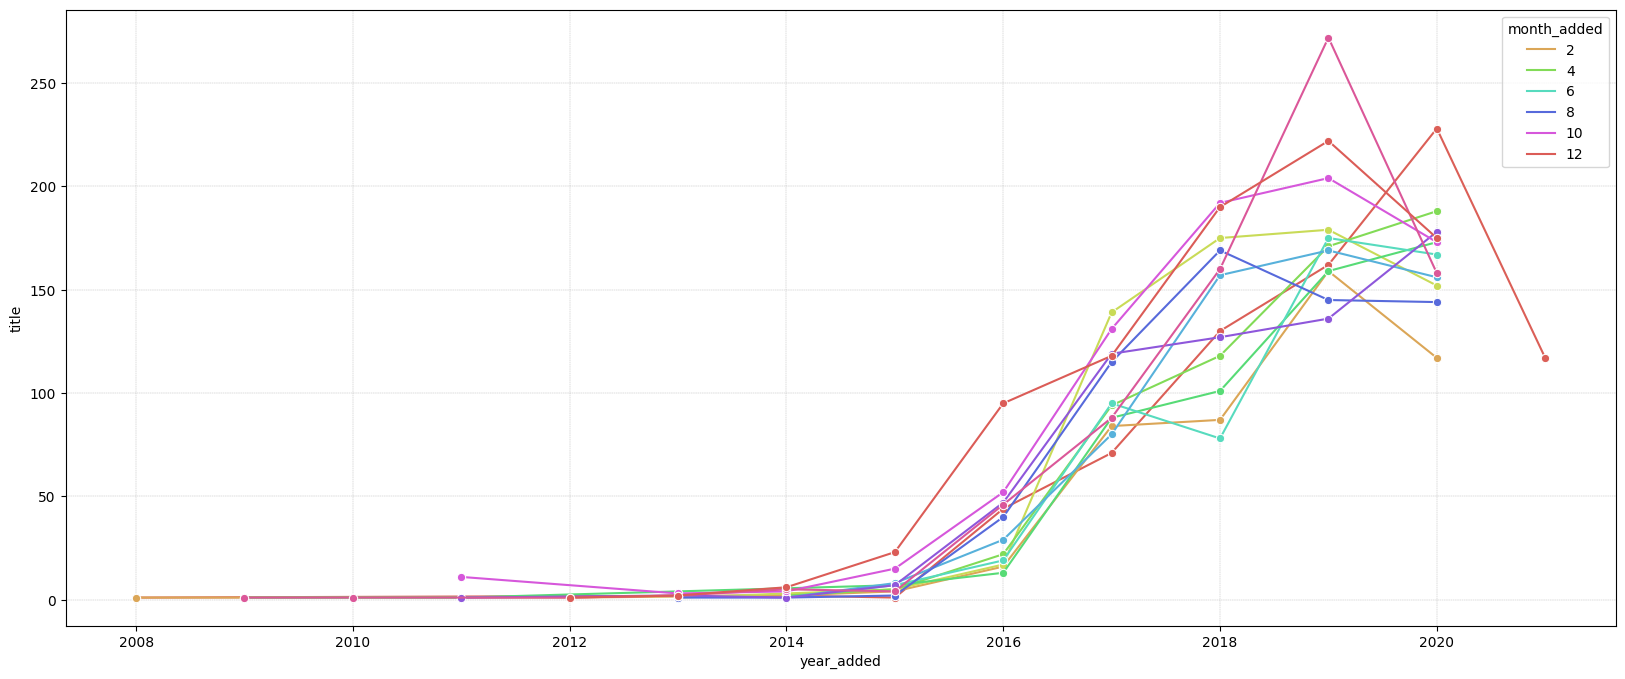

In [38]:
plt.figure(figsize=(20,8))
df_year_month = df.groupby(['year_added','month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x = 'year_added',y='title', data = df_year_month, palette = 'hls', hue=df_year_month['month_added'], marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

This bivariate graph helps us in knowing which month is dominating in adding movie/tvshows in a year.

##### 2. What is/are the insight(s) found from the chart?

1.   We can see that there is no specific trend is followed, Instead of this some consecutive years shows month wise trend.

2. From **2008 to 2009 we see movies added in the month of February, and from 2009  to 2011 movies added in the month of February and October**.

3. After 2015 majority content added in the month of october to december

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Producers should add there movies in the month when audience is more responsive.

2. Although no specific trend is shown but most movies should be uploaded in year end with some discount in the subscription.

#### Chart - 12 (What is the Day-wise number of content added in each year on Netflix?)

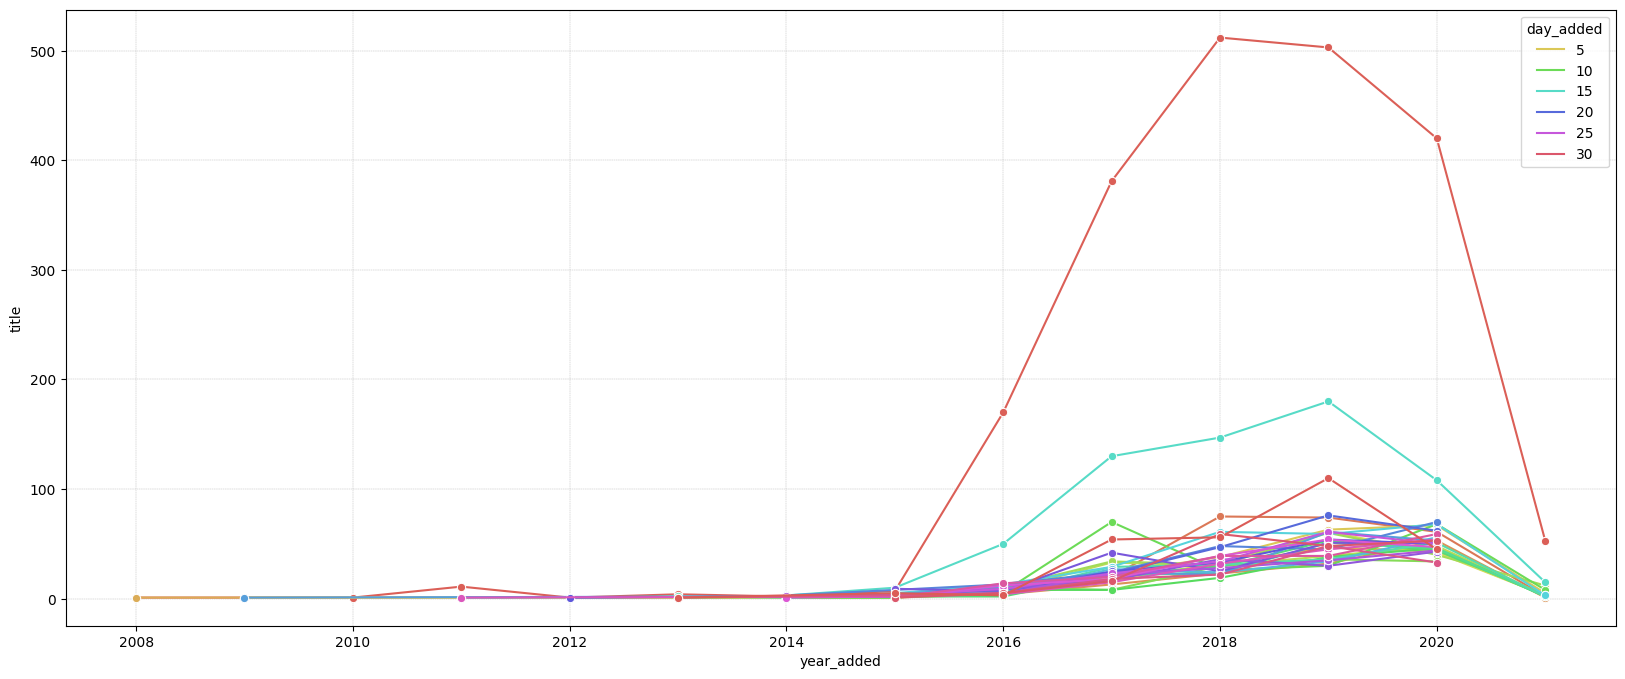

In [39]:
plt.figure(figsize=(20,8))
df_year_month = df.groupby(['year_added','day_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x = 'year_added',y='title', data = df_year_month, palette = 'hls', hue=df_year_month['day_added'], marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

This graph help us in knowing which day is more frequent in movie addition year wise.

##### 2. What is/are the insight(s) found from the chart?

1. Movies from **2008 to 2009 added on 5th day** of the month.
2. Movies from **2009 to 2010 added on 15th day** of the month.
3. Most of the movies from **2010 to 2012 added in the month end.**
4. From **2015 onwords most of the movies are added in month end or mid month.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Currently most of the movies are added in 15th day of month or at the last day of month, so before releasing the movies consider this trend also.

#### Chart - 13 (What is the Distribution of Duration of contents over Netflix?)

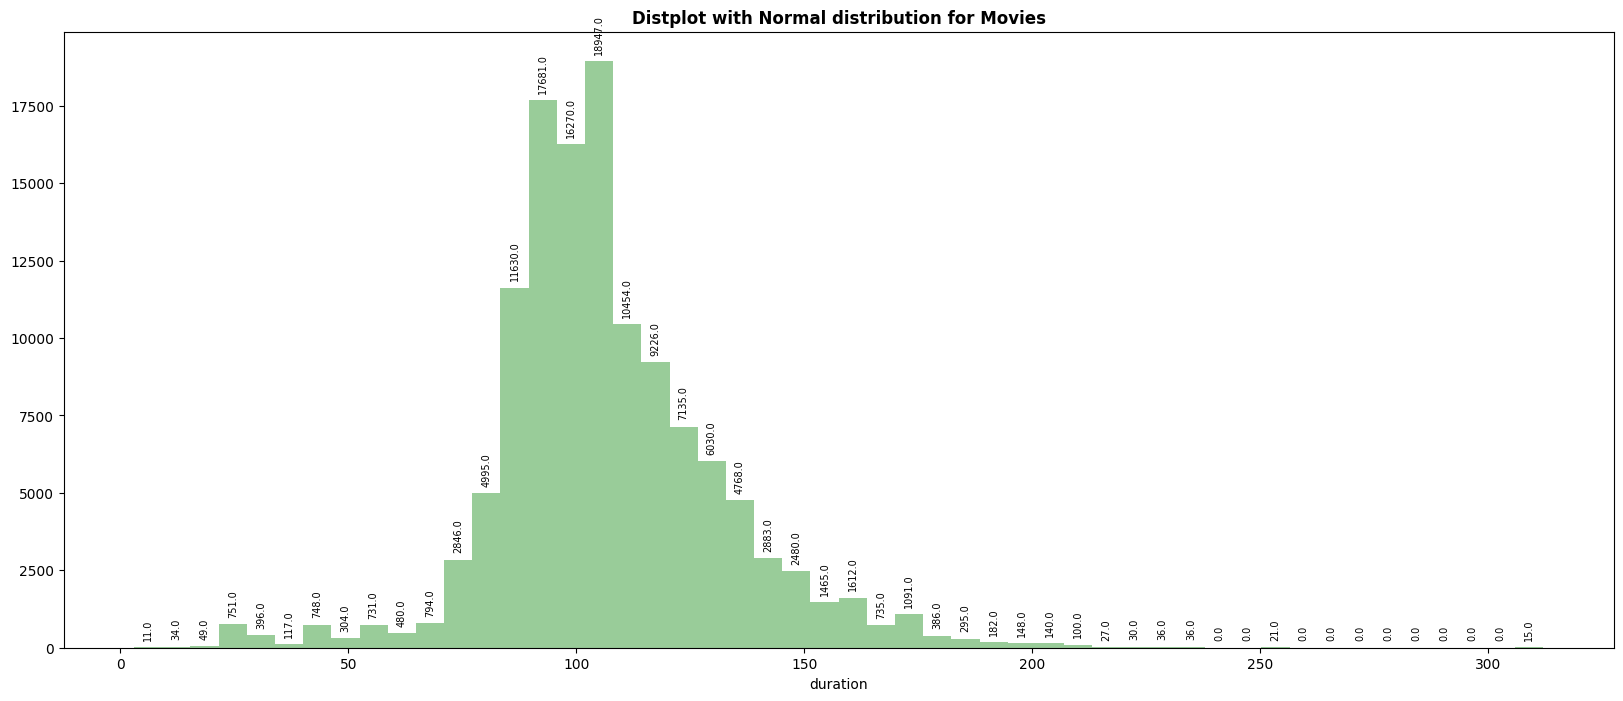

In [40]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(20, 8))
plots= sns.distplot(df_movies['duration'],kde=False, color=['green'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='bottom',
                  size=7, xytext=(0, 5),
                  textcoords='offset points', rotation=90)
plt.show()

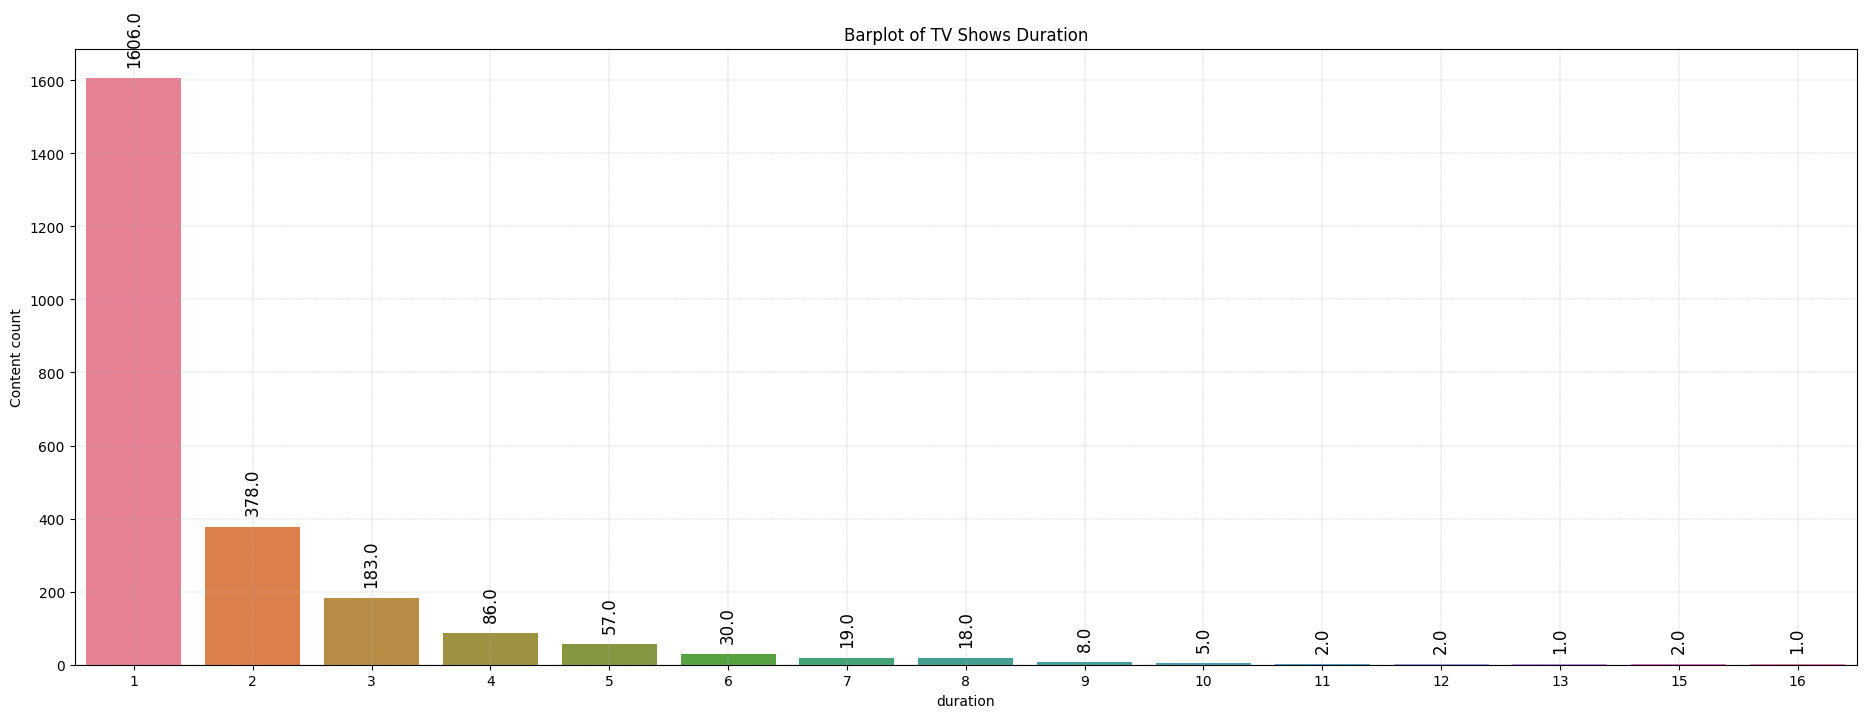

In [41]:
plt.figure(figsize=(23,8))
df_duration = df_tvshows.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['duration'],ascending=False)
plots= sns.barplot(x = 'duration',y='title', data = df_duration, palette='husl')
plt.title(f'Barplot of TV Shows Duration')
plt.ylabel(f"Content count")
plt.grid(linestyle='--', linewidth=0.3)
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='bottom',
                  size=12, xytext=(0, 8),
                  textcoords='offset points', rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To know the duration distribution for Movies and TV Shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?

1.The histogram of the distribution of movie durations in minutes on Netflix shows that the **majority of movies on Netflix have a duration between 80 to 120 minutes. **

2.The countplot of the distribution of TV show durations in seasons on Netflix shows that the most common **duration for TV shows on Netflix is one season**, followed by two seasons.

#### Chart - 14 - (What is the Distribution of Content Rating in each highest content creating countries?)

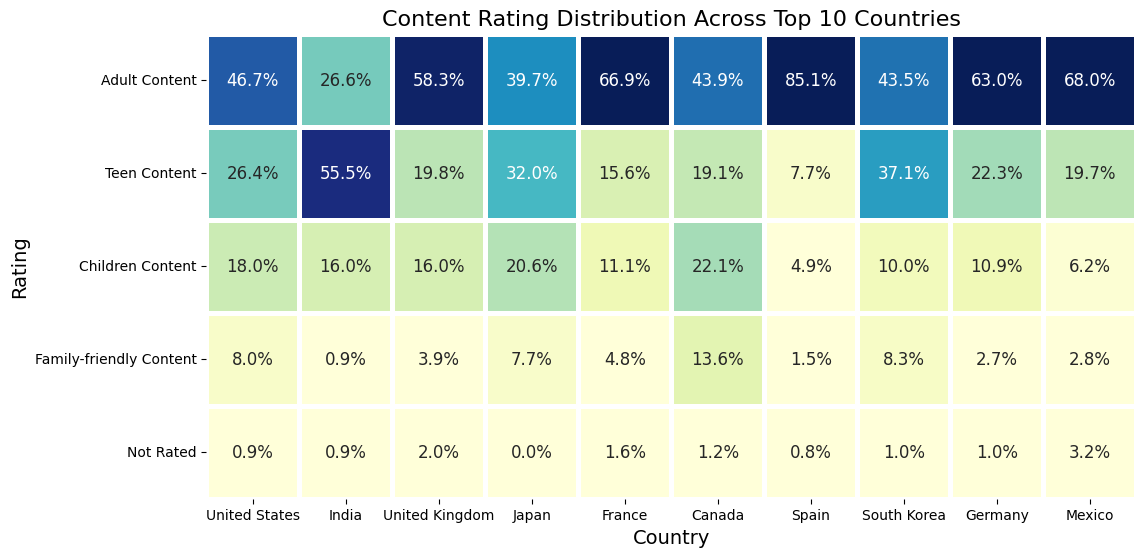

In [42]:
# Adding count column
df['count'] = 1

# Grouping and filtering top 10 countries
data = df.groupby('Country')['count'].sum().nlargest(10).reset_index()['Country']
df_heatmap = df[df['Country'].isin(data)]

# Creating a normalized crosstab for the heatmap
df_heatmap = pd.crosstab(df_heatmap['Country'], df_heatmap['rating'], normalize="index").T

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 10))

# Defining order of representation
country_order = data.tolist()
rating_order = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# Calling and plotting heatmap with a different color palette
sns.heatmap(df_heatmap.loc[rating_order, country_order], cmap="YlGnBu", square=True, linewidth=2.5, cbar=False, annot=True, fmt='.1%',
            vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize": 12})

# Adding labels and title
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Rating', fontsize=14)
plt.title('Content Rating Distribution Across Top 10 Countries', fontsize=16)

plt.show()



##### 1. Why did you pick the specific chart?

This graph shows us which countries producing which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

1. We found that **most of the countries produces content related to Adult and Teen.**

2. Amomg all the countries **INDIA has less content in Adult segment than teen content.**

3. **85% of content is Adult content from spain.**
4. **Canada produces more content related to Children and Family-Friendly content**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Companies should target the country audience according to there taste of content choice.

2. As in spain Production house should more focus on Adult content.

3. Production house should more focus on children and Family-friendly content for canada because there are chances of Growth.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

*Hypothetical Statement 1:*
* **Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

* **Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

*Hypothetical Statement 2:*
* **Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

* **Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

*Hypothetical Statement 3:*
* **Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

* **Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Subset the data to only include drama and comedy movies
subset = df[df['Genre'].str.contains('Dramas') | df['Genre'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['Genre'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['Genre'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  64.8000705213286
p-value:  0.0
Reject the null hypothesis.


We conclude that there is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

##### Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the z-test for proportions.


##### Why did you choose the specific statistical test?

The z-test for proportions was chosen because we are comparing the proportions of two categorical variables (drama movies and comedy movies) in a sample. The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not. The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

**Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2020)]
tv_2021 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)
print('t-value: ', t)
print('p-value: ', p)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')



t-value:  -6.002151232542292
p-value:  7.23381843379902e-09
Reject null hypothesis. 
The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-Value is a two-sample t-test.


##### Why did you choose the specific statistical test?

The two-sample t-test was chosen because we are comparing the means of two different samples (TV shows added in 2020 vs TV shows added in 2021) to determine whether they are significantly different. Additionally, we assume that the two samples have unequal variances since it is unlikely that the duration of TV shows added in 2020 and 2021 would have the exact same variance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

**Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.           

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(df_tvshows['Country'].str.contains('United States')) / len(df_tvshows)
movie_proportion = np.sum(df_movies['Country'].str.contains('United States')) / len(df_movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(df_tvshows)), int(movie_proportion * len(df_movies))]
nobs = [len(df_tvshows), len(df_movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  -4.838078469799881
p-value:  1.3110038583414833e-06
Reject the null hypothesis.


We conclude that the proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is a two-sample proportion test.



##### Why did you choose the specific statistical test?

We chose this specific statistical test because it is appropriate for comparing two proportions, and it helps us to determine whether the difference between the two proportions is due to chance or not.





## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation
# Since we have already dealed with null value. So it is not needed now.
df.isna().sum()

title           0
Actors          0
Directors       0
Genre           0
Country         0
type            0
release_year    0
rating          0
duration        0
description     0
day_added       0
month_added     0
year_added      0
count           0
dtype: int64

Let's move ahead, as we have already dealed with null/missing values from our dataset.

### 2. Handling Outliers

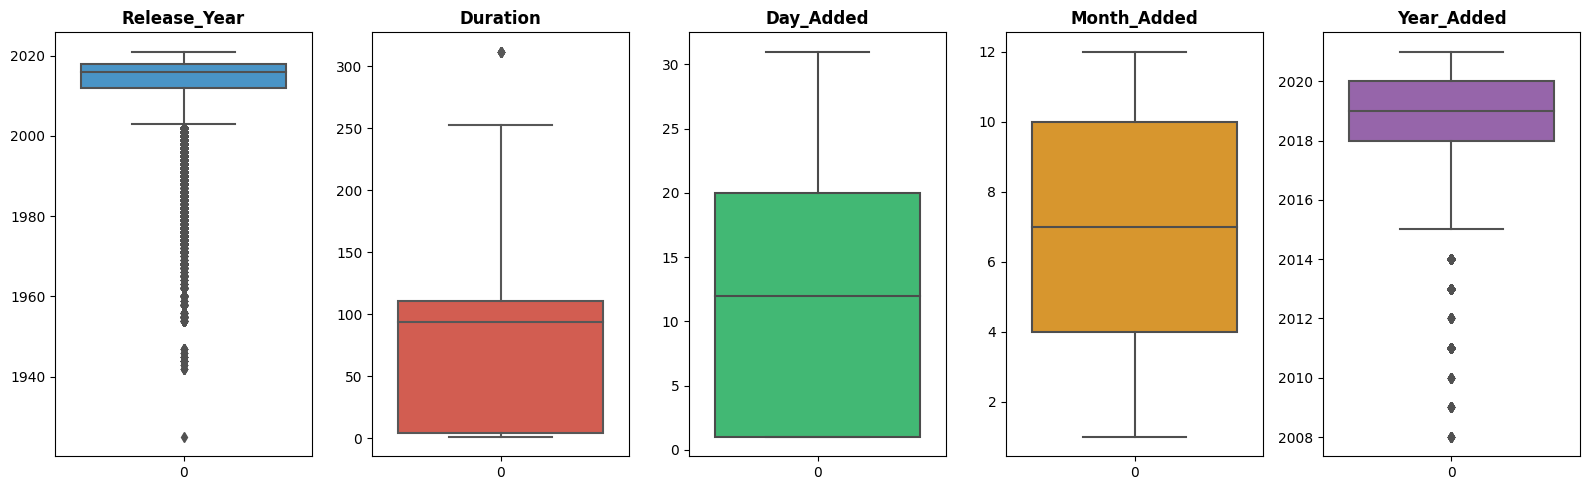

In [47]:
# Storing the continuous value feature in a separate list
continuous_value_feature = ["release_year", "duration", "day_added", "month_added", "year_added"]

# Custom color palette
custom_palette = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6"]

# Checking outliers with the help of a box plot for continuous features
plt.figure(figsize=(16, 5))

for n, column in enumerate(continuous_value_feature):
    plt.subplot(1, 5, n+1)
    sns.boxplot(df[column], color=custom_palette[n])
    plt.title(f'{column.title()}', weight='bold')

plt.tight_layout()  # Ensure proper layout
plt.show()


Although we have some of the anomalies in continous feature but we will not treat by considering outliers as some of the Movies/TV Shows has released or added early on Netflix.

### 3. Textual Data Preprocessing

In [48]:
# Here we are taking the copied dataframe as the data having more number of observations resulted in ram exhaustion.
df.shape, df_new.shape

((175807, 14), (7770, 12))

In [49]:
# Binning of rating in new dataframe
df_new['rating'].replace(rating_map, inplace = True)

# Checking sample after binning
df_new.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4247,s4248,Movie,Mowgli: Legend of the Jungle,Andy Serkis,"Christian Bale, Cate Blanchett, Benedict Cumbe...","United Kingdom, United States","December 7, 2018",2018,Teen Content,105 min,"Action & Adventure, Children & Family Movies, ...",An orphaned boy raised by animals in the jungl...
3120,s3121,Movie,Janaan,Azfar Jafri,"Armeena Rana Khan, Bilal Ashraf, Ali Rehman Kh...",Pakistan,"September 15, 2017",2016,Teen Content,132 min,"Comedies, Dramas, International Movies","After 11 years in Canada, young Meena returns ..."


#### 1. Textual Columns

In [50]:
# Creating new feature content_detail with the help of other textual attributes
df_new["content_detail"]= df_new["cast"]+" "+df_new["director"]+" "+df_new["listed_in"]+" "+df_new["type"]+" "+df_new["rating"]+" "+df_new["country"]+" "+df_new["description"]

#checking the manipulation
df_new.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_detail
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,Adult Content,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,Adult Content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,Adult Content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,Teen Content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,Teen Content,123 min,Dramas,A brilliant group of students become card-coun...,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."


#### 2. Lower Casing

In [51]:
# Lower Casing
df_new['content_detail']= df_new['content_detail'].str.lower()

# Checking the manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia, prabhu deva, sonu sood, sapthagiri, murli sharma, r.v. udhaykumar, joy mathew, hema a. l. vijay comedies, international movies, sci-fi & fantasy movie teen content india due to family pressure, a corporate man reluctantly marries a woman from the village, but in their new home, she abruptly assumes a different persona.'

#### 3. Removing Punctuations

In [52]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [53]:
# Removing Punctuations from the content_detail
df_new['content_detail']= df_new['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teen content india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 4. Removing URLs & Removing words and digits contain digits.

In [54]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [55]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teen content india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 5. Removing Stopwords & Removing White spaces

In [56]:
# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [57]:
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [58]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedies international movies scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

In [59]:
df_new['content_detail'][0]

'jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi unknown international tv shows tv dramas tv scifi fantasy tv show adult content brazil future elite inhabit island paradise far crowded slums get one chance join saved squalor'

#### 6. Tokenization

In [60]:
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
df_new['content_detail']= df_new['content_detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['tamannaah',
 'bhatia',
 'prabhu',
 'deva',
 'sonu',
 'sood',
 'sapthagiri',
 'murli',
 'sharma',
 'rv',
 'udhaykumar',
 'joy',
 'mathew',
 'hema',
 'l',
 'vijay',
 'comedies',
 'international',
 'movies',
 'scifi',
 'fantasy',
 'movie',
 'teen',
 'content',
 'india',
 'due',
 'family',
 'pressure',
 'corporate',
 'man',
 'reluctantly',
 'marries',
 'woman',
 'village',
 'new',
 'home',
 'abruptly',
 'assumes',
 'different',
 'persona']

#### 7. Text Normalization

In [61]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [62]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [63]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df_new['content_detail']= df_new['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedy international movie scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

##### Which text normalization technique have you used and why?

We have used Lemmatization instead of Stemming for our project because:

* **Lemmatization produces a more accurate base word**: Unlike Stemming, which simply removes the suffix from a word, Lemmatization looks at the meaning of the word and its context to produce a more accurate base form.

* **Lemmatization can handle different inflections**: Lemmatization can handle various inflections of a word, including plural forms, verb tenses, and comparative forms, making it useful for natural language processing.

* **Lemmatization produces real words**: Lemmatization always produces a real word that can be found in a dictionary, making it easier to interpret the results of text analysis.

* **Lemmatization improves text understanding**: By reducing words to their base form, Lemmatization makes it easier to understand the context and meaning of a sentence.

* **Lemmatization supports multiple languages**: While Stemming may only work well for English, Lemmatization is effective for many different languages, making it a more versatile text processing technique.

#### 8. Part of speech tagging

In [64]:
# tokenize the text into words before POS Taging
df_new['pos_tags'] = df_new['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df_new.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_detail,pos_tags
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,Adult Content,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,jo miguel bianca comparato michel gomes rodolf...,"[(jo, NN), (miguel, NN), (bianca, NN), (compar..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,Adult Content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,demi n bichir h ctor bonilla oscar serrano aza...,"[(demi, NN), (n, CC), (bichir, NN), (h, NN), (..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,Adult Content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",tedd chan stella chung henley hii lawrence koh...,"[(tedd, NN), (chan, NN), (stella, NN), (chung,..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,Teen Content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",elijah wood john c reilly jennifer connelly ch...,"[(elijah, RB), (wood, NN), (john, NN), (c, VBP..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,Teen Content,123 min,Dramas,A brilliant group of students become card-coun...,jim sturgess kevin spacey kate bosworth aaron ...,"[(jim, NN), (sturgess, NN), (kevin, NN), (spac..."


#### 9. Text Vectorization

In [65]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=30000)        # Setting max features as 30000 to avoid RAM explosion

In [66]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(df_new['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)

(7770, 30000)


##### Which text vectorization technique have you used and why?

We have used TFIDF vectorization in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In textual data processing, there are 30,000 attributes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

In [67]:
# Dimensionality Reduction
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [1.44285929e-02 4.03650307e-03 3.30085224e-03 ... 7.07558182e-36
 7.59477555e-37 2.00962732e-37]


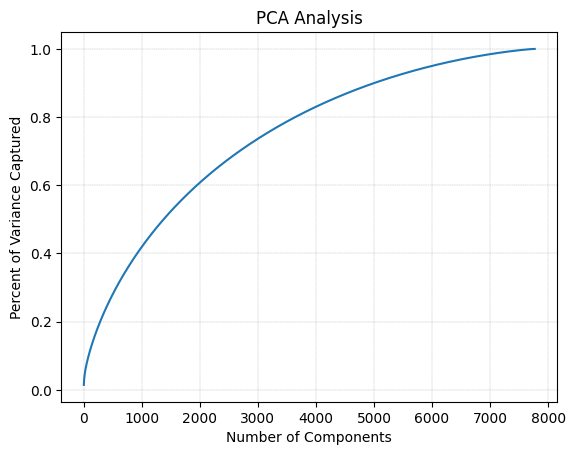

In [68]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

It is clear from the above plot that 7770 principal components can capture the 100% of variance. For our case we will consider only those number of PC's that can capture 95% of variance.

In [ ]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

##### Which dimensionality reduction technique have you used and why?

We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.

PCA works by finding the principal components of the data, which are linear combinations of the original features that capture the maximum amount of variation in the data. By projecting the data onto these principal components, PCA can reduce the number of dimensions while retaining most of the information in the original data.

PCA is a popular choice for dimensionality reduction because it is simple to implement, computationally efficient, and widely available in most data analysis software packages. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.

## ***7. ML Model Implementation***

### ML Model - 1 (K-Means Clustering)

K-means clustering is a type of unsupervised machine learning algorithm used for partitioning a dataset into K clusters based on similarity of data points. The goal of the algorithm is to minimize the sum of squared distances between each data point and its corresponding cluster centroid. It works iteratively by assigning each data point to its nearest centroid and then re-computing the centroid of each cluster based on the new assignments. The algorithm terminates when the cluster assignments no longer change or when a maximum number of iterations is reached.

Let's just itterate over a loop of 1 to 16 clusters and try to find the optimal number of clusters with ELBOW method.

In [ ]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

Here it seems that the elbow is forming at the 2 clusters but before blindly believing it let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

Okay, but what is **Silhouette Score**?

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering, where a higher score indicates that objects are more similar to their own cluster and dissimilar to other clusters.

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

In [ ]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will consider 4 cluster in kmeans analysis.

Now let's plot and see how our data points look like after assigning to their respective clusters.

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

We have 4 different clusters but unfortunately the above plot is in TWO-DIMENSIONAL. Let's plot the above figure in 3D using mplot3d library and see if we are getting the separated clusters.

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool, we can easily differentiate the all 4 clusters with naked eye. Now let's assign the 'Conent' in their respective cluster by appending 1 more attribute in the final dataframe.

In [ ]:
# Add cluster values to the dateframe.
df_new['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance ?

Starting with defining a function that plot a wordcloud for each of the attribute in the given dataframe.

In [ ]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df_new[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 2 (Hierarchial Clustering)

Hierarchical clustering is a type of clustering algorithm used for grouping similar data points together into clusters based on their similarity, by recursively merging or dividing clusters based on a measure of similarity or distance between them.

Let's dive into it by plotting a Dendogram and then we will determine the optimal number of clusters.

In [ ]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

Cool, but what is Dendogram and how to determine the **optimal value of clusters?**

* A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
* From the above Dendogram we can say that optimal value of clusters is 2. But before assigning the vlaues to respective clusters, let's check the silhouette scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

From the above silhouette scores it is clear that the 2  clusters are optimal value (maximum Silhouette score), which is also clear from the above Dendogram that for 2 cluters the euclidean distances are maximum.

Let's again plot the chart and observe the 2 different formed clusters.

In [ ]:
#training the K-means model on a dataset
Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

Again plotting the 3 Dimensional plot to see the clusters clearly.

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[Agmodel.labels_ == i, 0], x_transformed[Agmodel.labels_ == i, 1], x_transformed[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool, we can again easily differentiate the all 2 clusters with naked eye. Now let's assign the 'Content(Movies and TV Shows)' in their respective cluster by appending 1 more attribute in the final dataframe.

In [ ]:
# Add cluster values to the dateframe.
df_new['agglomerative_cluster'] = Agmodel.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Let's just again define a function that plots wordcloud for different attributes using Agglomerative Clustering.

In [ ]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df_new[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 3 (Cosine similarity)

Cosine Similarity as a Measure:

Cosine similarity is used to measure the similarity between two non-zero vectors in a multidimensional space.
It calculates the cosine of the angle between two vectors, providing a similarity score ranging from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (perpendicular vectors).

Application to Text Documents:

Cosine similarity is applied to determine the similarity between two documents or pieces of text.

Documents are represented as vectors in a high-dimensional space, where each dimension corresponds to a word or term in the corpus.

Advantages of Cosine Similarity over TF-IDF:

Handling High Dimensional Sparse Data:
Cosine similarity is better suited for high-dimensional sparse data, which is common in text data.

Capturing Meaning and Word Order:

Cosine similarity captures the meaning of text more effectively than TF-IDF.
It considers the arrangement of words and is less sensitive to variations in word order. For example, even if two items contain similar words but in different orders, cosine similarity would still consider them similar.

Choice Over TF-IDF:

Cosine similarity is preferred over TF-IDF in this project.
The choice is based on the ability of cosine similarity to handle high-dimensional sparse data more effectively and to capture the meaning of the text, including word order.

In [ ]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_new['content_detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=df_new):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

Let's check how our recommender system is performing.

In [ ]:
# Testing indian movie
recommend_content('Kal Ho Naa Ho')

In [ ]:
# Testing non indian movie
recommend_content('Zombieland')

In [ ]:
# Testing indian tv show
recommend_content('Zindagi Gulzar Hai')

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Measuring Cluster Quality:

Silhouette score and distortion score are metrics used to evaluate the quality of clusters formed during clustering analysis.

Silhouette Score's Advantages:

Silhouette score considers both how similar data points within a cluster are (cohesion) and how dissimilar data points in different clusters are (separation).


It provides a score for each data point, indicating how well it fits within its own cluster and how separated it is from other clusters.


Silhouette score is less sensitive to the shape of clusters, making it suitable for clusters with diverse shapes.



The results are more intuitive and interpretable.


Distortion Score Limitations:

Distortion score mainly focuses on the compactness of each cluster but may not adequately consider how well-separated clusters are.


It tends to favor spherical clusters, and this preference might not align with the actual shape of your clusters.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have considered **K-means** as our final model, as we are getting the comparatevely **high Silhoutte Score in K-means clustering** and the resulted clusters are very well seperated from each others as have saw in the 3 dimensions.

Also in some of the situations K-means works more accurately then other clustering methods such as:
* **Speed**: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

* **Ease of use**: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

* **Scalability**: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

* **Independence of clusters**: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import joblib

# Save cosine similarity matrix
joblib.dump(cosine_sim, 'cosine_similarity_matrix.joblib')

# Save the recommendation function
joblib.dump(recommend_content, 'recommend_content_function.joblib')


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load cosine similarity matrix
cosine_sim_loaded = joblib.load('cosine_similarity_matrix.joblib')

# Load the recommendation function
recommend_content_loaded = joblib.load('recommend_content_function.joblib')


In [ ]:
# Testing non indian tv show
recommend_content('Vampires')

# **Conclusion**

### **Conclusions drawn from EDA**

**Based on the exploratory data analysis (EDA) of the Netflix movies and TV shows clustering dataset, we have drawn the following conclusions:**

* Movies make up about **two-thirds **of Netflix content, with TV shows comprising the remaining **one-third**.

* Adult and teen categories are prevalent on Netflix, while family-friendly content is more common in TV shows than in movies.

* Indian actors dominate Netflix movies, while popular Indian actors are absent from TV shows.

* **Jan Suter** is the most common movie director, and **Ken Burns** is the most common TV show director on Netflix.

* The **United States** is the largest producer of movies and TV shows on Netflix, followed by **India**. **Japan** and **South Korea** have more TV shows than movies, indicating growth potential in that area.

* **International movies, drama, and comedy** are the most popular genres on Netflix.

* TV show additions on Netflix have increased since **2018**, while movie additions have decreased. In **2020**, fewer movies were added compared to **2019**, but more TV shows were added.

* **October, November, and December** are popular months for adding TV shows, while **January, October, and November** are popular for adding movies. February sees the least additions.

* **Movies and TV shows** are typically added at the beginning or middle of the month and are popularly added on weekends.

* Most movies on Netflix have durations between **80 to 120 minutes**, while TV shows commonly have **one or two seasons**.

* Various countries contribute **adult and teen content**, with Spain producing the most **adult content** and Canada focusing on **children and family-friendly** categories.

### **Conclusions drawn from ML Model**

* Implemented **K-Means Clustering and Agglomerative Hierarchical Clustering**, to cluster the Netflix Movies TV show dataset.
* The optimal number of clusters we are getting from **K-means is 4**, whereas for **Agglomerative Hierarchical Clustering the optimal number of clusters are found out to be 2**.
* We chose **Silhouette Score as the evaluation metric** over distortion score because it provides a more intuitive and interpretable result. Also Silhouette score is less sensitive to the shape of the clusters.
* Built a **Recommendation system** that can help Netflix **improve user experience and reduce subscriber churn** by providing personalized recommendations to users based on their similarity scores.

### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***